# Прогнозирование цен на мобильные устройства на основе методов машинного обучения

**Задачи:**
1. Сформулировать бизнес-цель

2. Сделать предварительный анализ данных (визуализация, описательная статистика, прверка пропусков)

3. Обработка данных (обработать все проблемы, очистить данные)

4. провести моделирование

5. Оценить качество моделей

6. Внедрение и рекомендации


# Бизнес-анализ

Заказчик - магазин элктроники. Предсказание цен на мобильные устройства имеет стратегическое значение для бизнеса на рынке электроники. Для определения адекватной цены магазин хочет внедрить систему, которая позволит им получать цену на основе характеристик той или иной модели.

**Бизнес-цели:**

- Повысить эффективность процесса ценообразования, исходя из тенденций, существующих на рынке
- Оптимизировать решения о закупках и маркетинговых активностях, что позволит минимизировать финансовые потери
- Повысить доверие клиентов к ценообразованию компании, что увеличит количество сделок

**Цели исследования данных.**

1.	Проведение разведочного анализа данных, включая визуализацию влияния различных факторов на цену квартиры, построение таблиц описания данных;
2.	Построение модели регрессии для применения в определении цены. В качестве моделей предполагается использование модели линейной регрессии, ближайшего соседа, деревьев решений, случайного леса.


**Критерии успешности изучения данных.**

Метрики оценки точности и качества построенных моделей:
Метрики оценки качества регрессии: коэффициент детерминации, среднее относительное отклонение.
Диапазон целевых значений метрик моделей: коэффициент детерминации (R2) >= 0.8, средняя относительная ошибка (MAPE) <= 10%.

# Начальное изучение данных

*   Новый пункт
*   Новый пункт



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error #MAPE
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Cellphone.csv", encoding = 'utf-8', sep = ',')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


### Сбор данных
**Внутренние данные:**
Id телефона, цена, скидка, вес, разрешение, ppi, ядро процессора, частота процессора, внутренняя память, оперативная память, задняя камера, фронтальная камера, батарея, толщина. https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction/data

**Внешние и дополнительные данные:** не требуются

### Описание данных
Объем данных: 17,7 Кбайт

Формат данных – файл csv, разделитель – “,”.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


### Исследование данных
**Построение описательной статистики**

In [ ]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


**Визуализация**

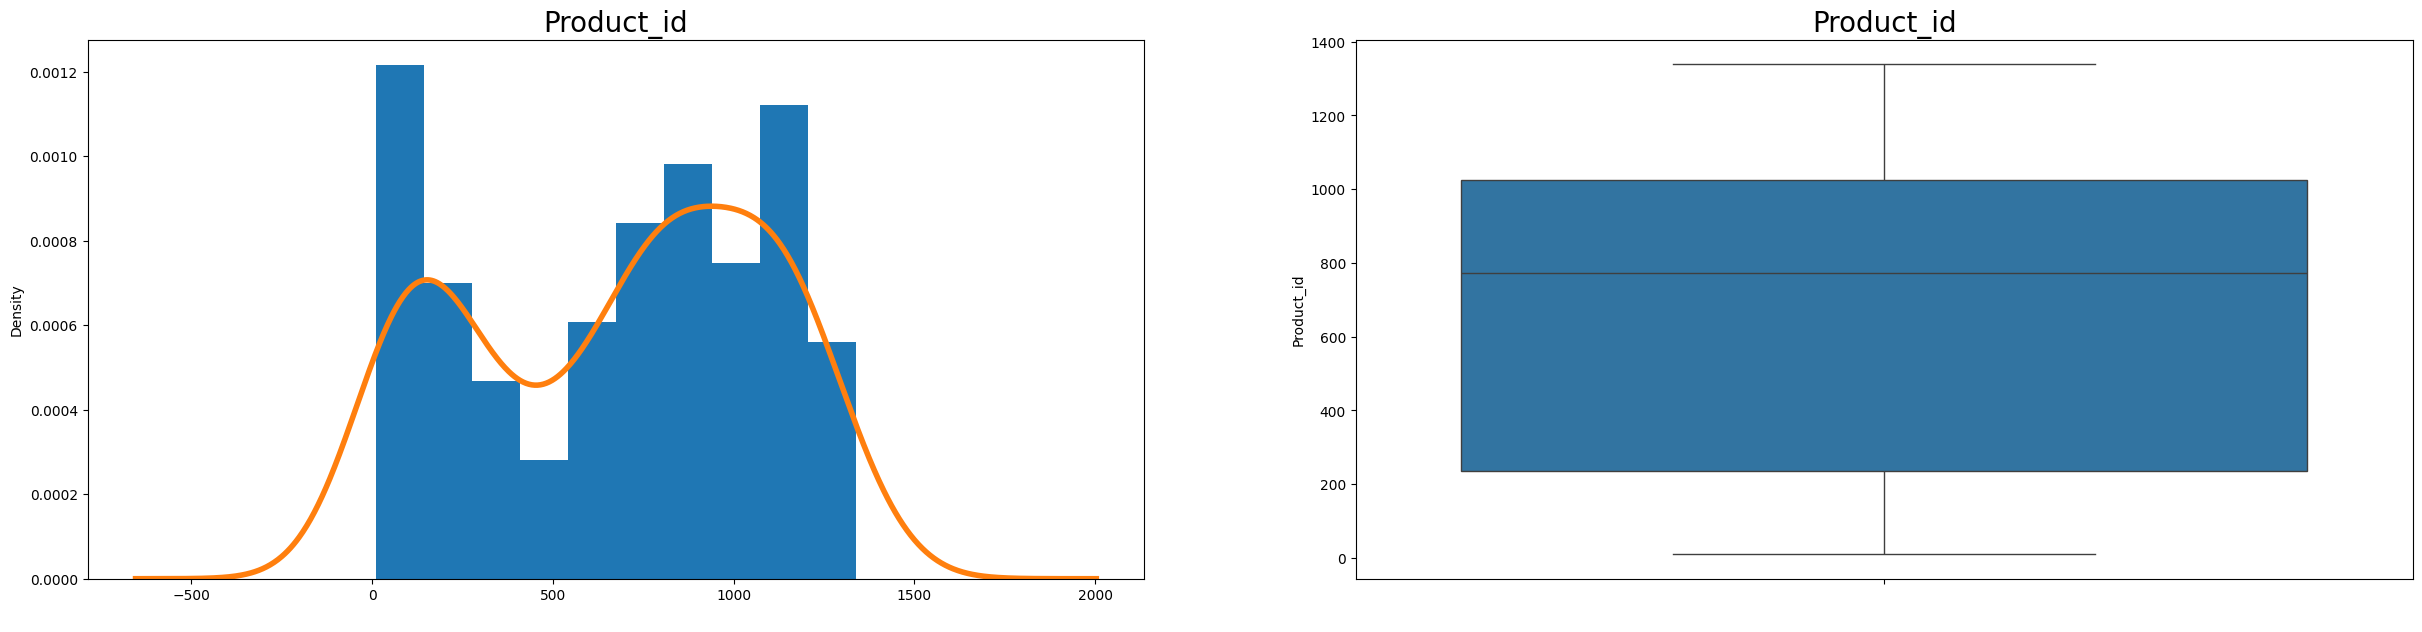

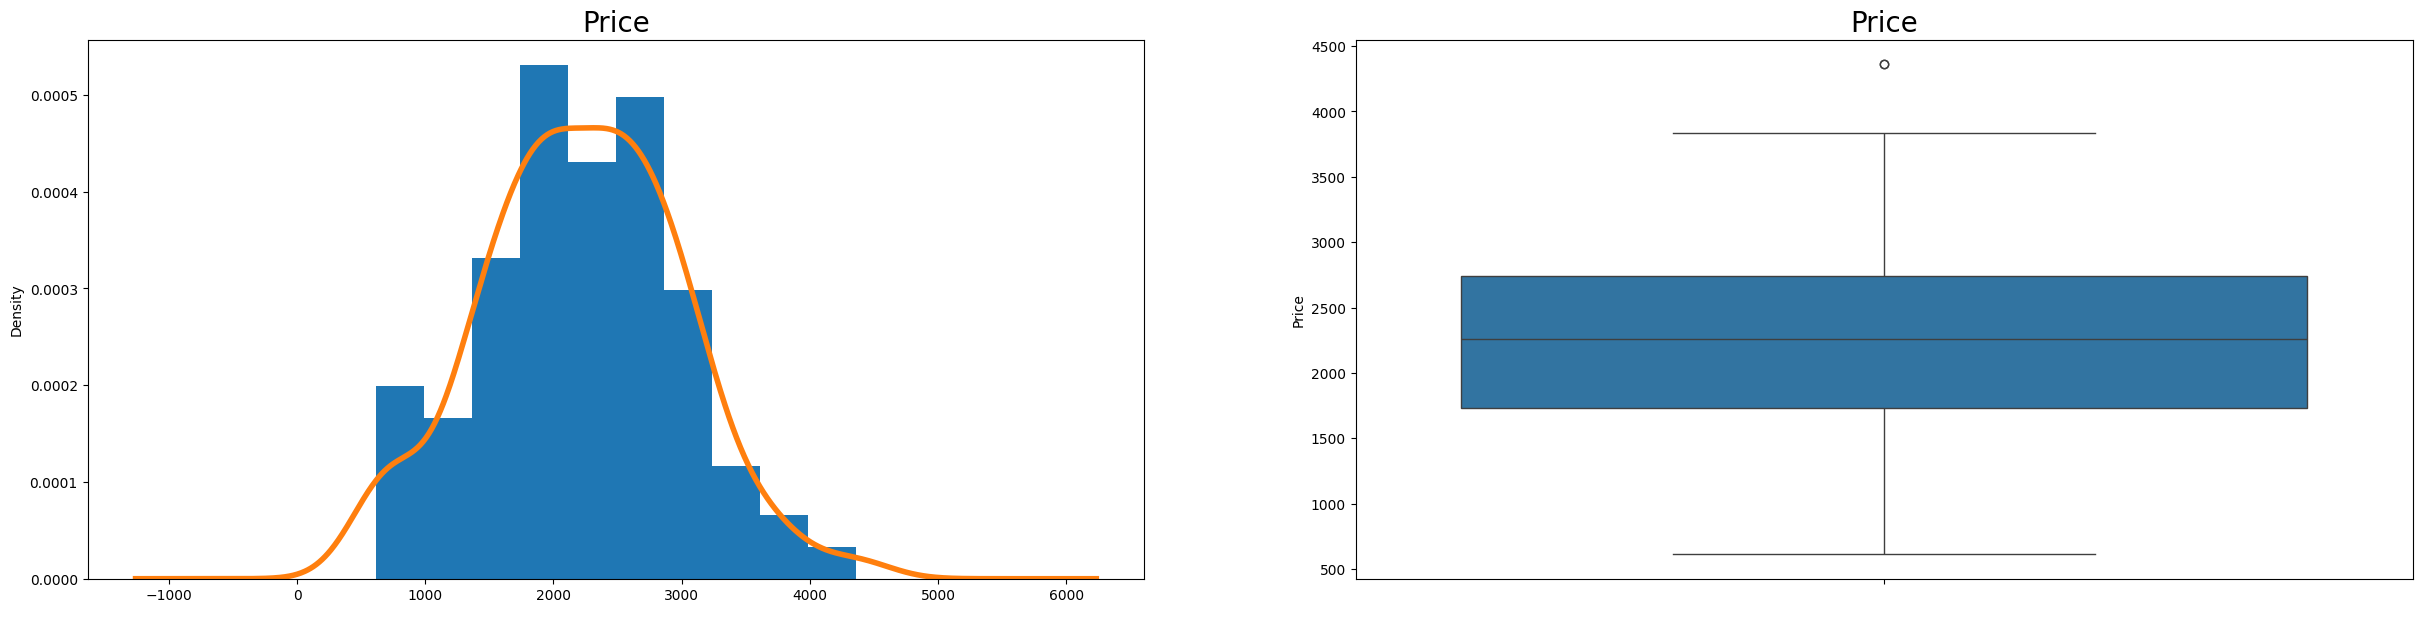

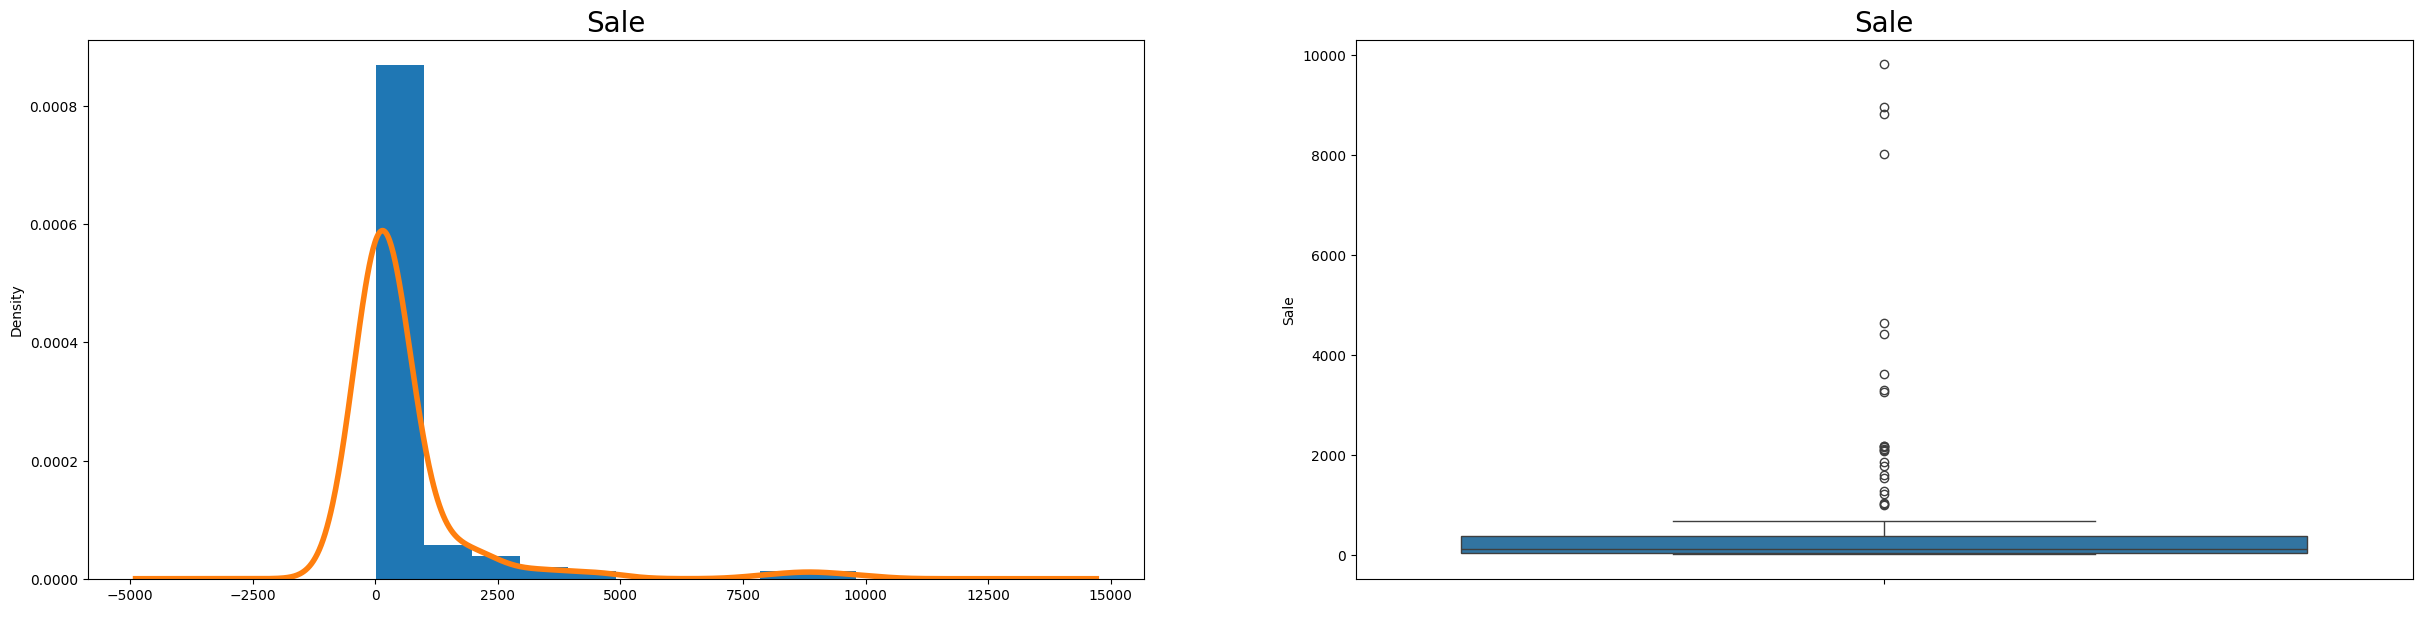

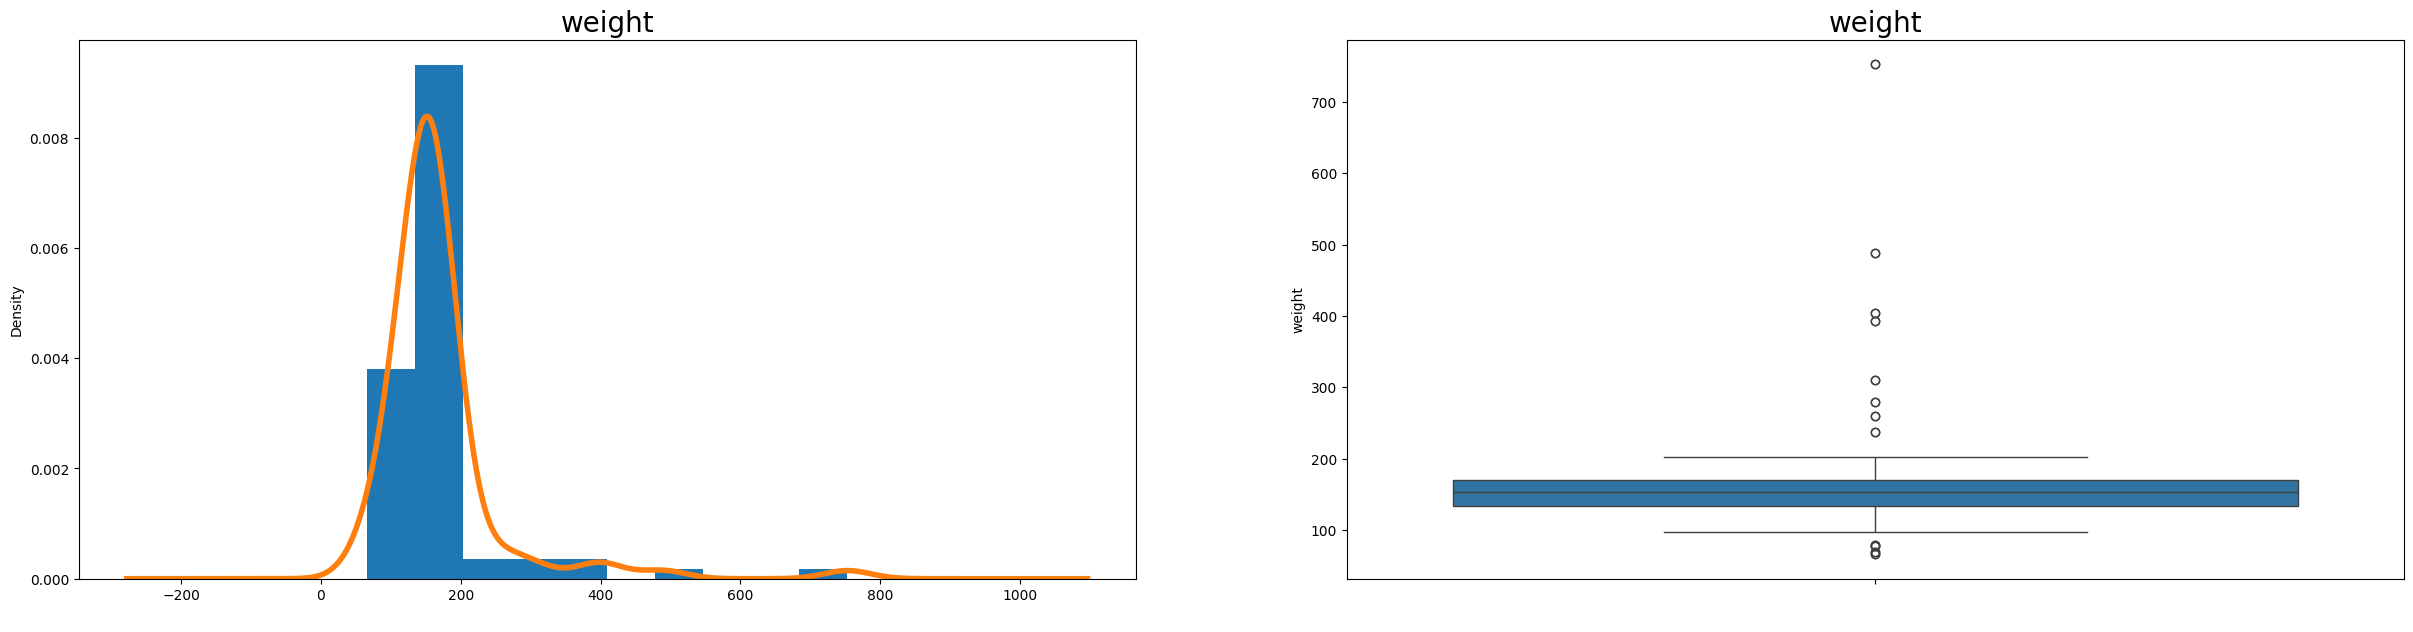

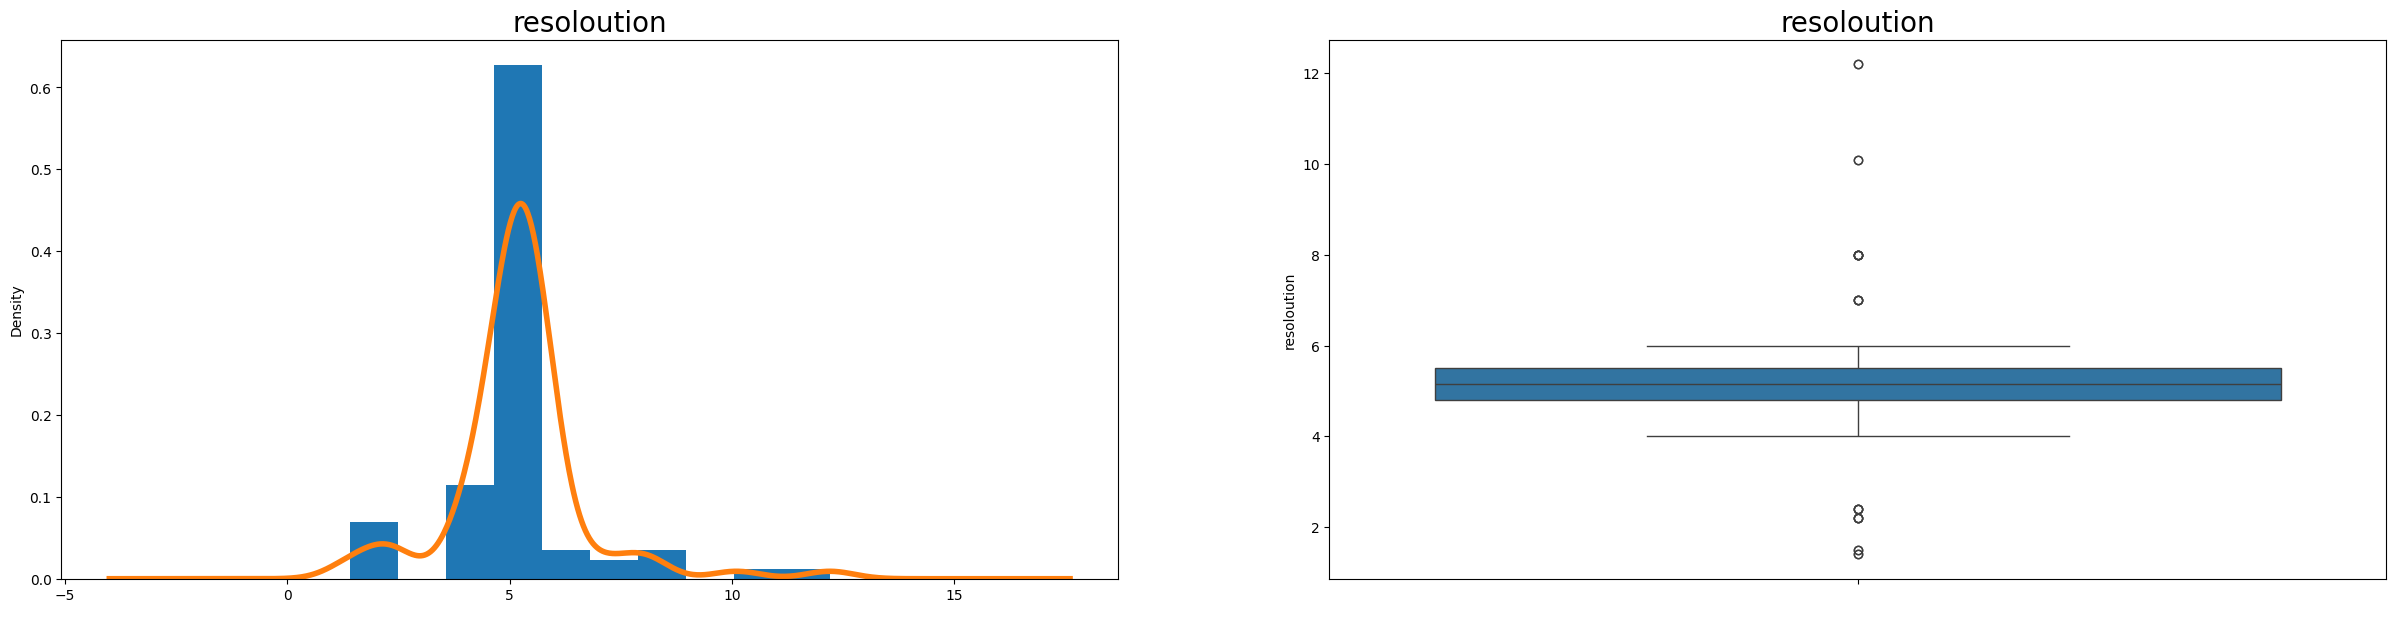

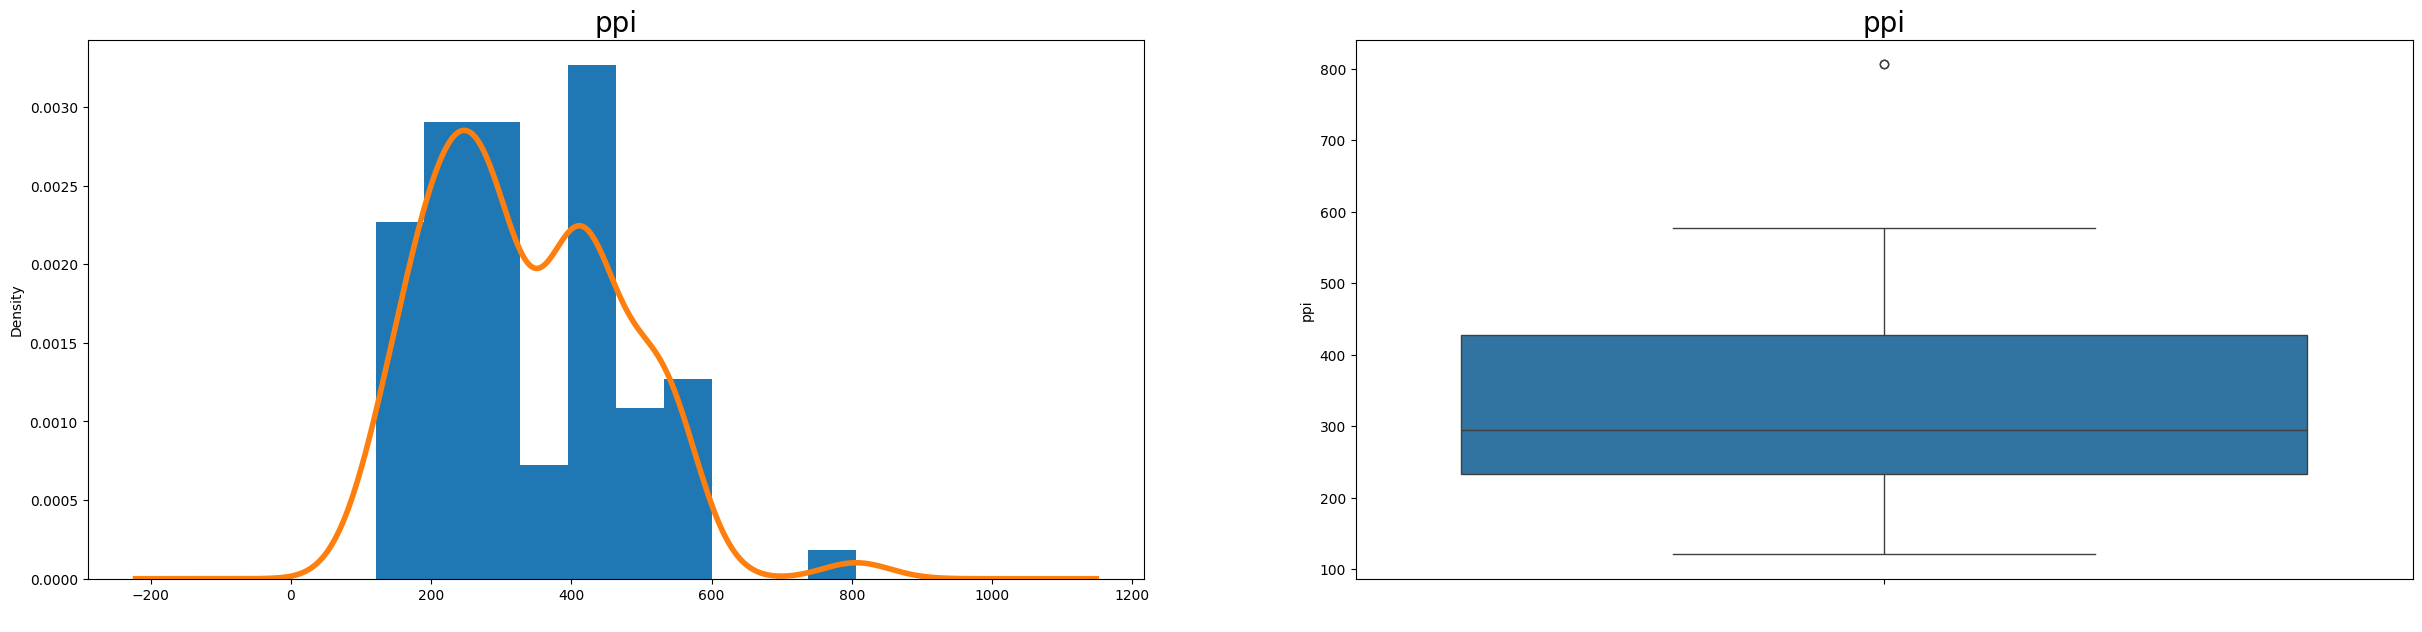

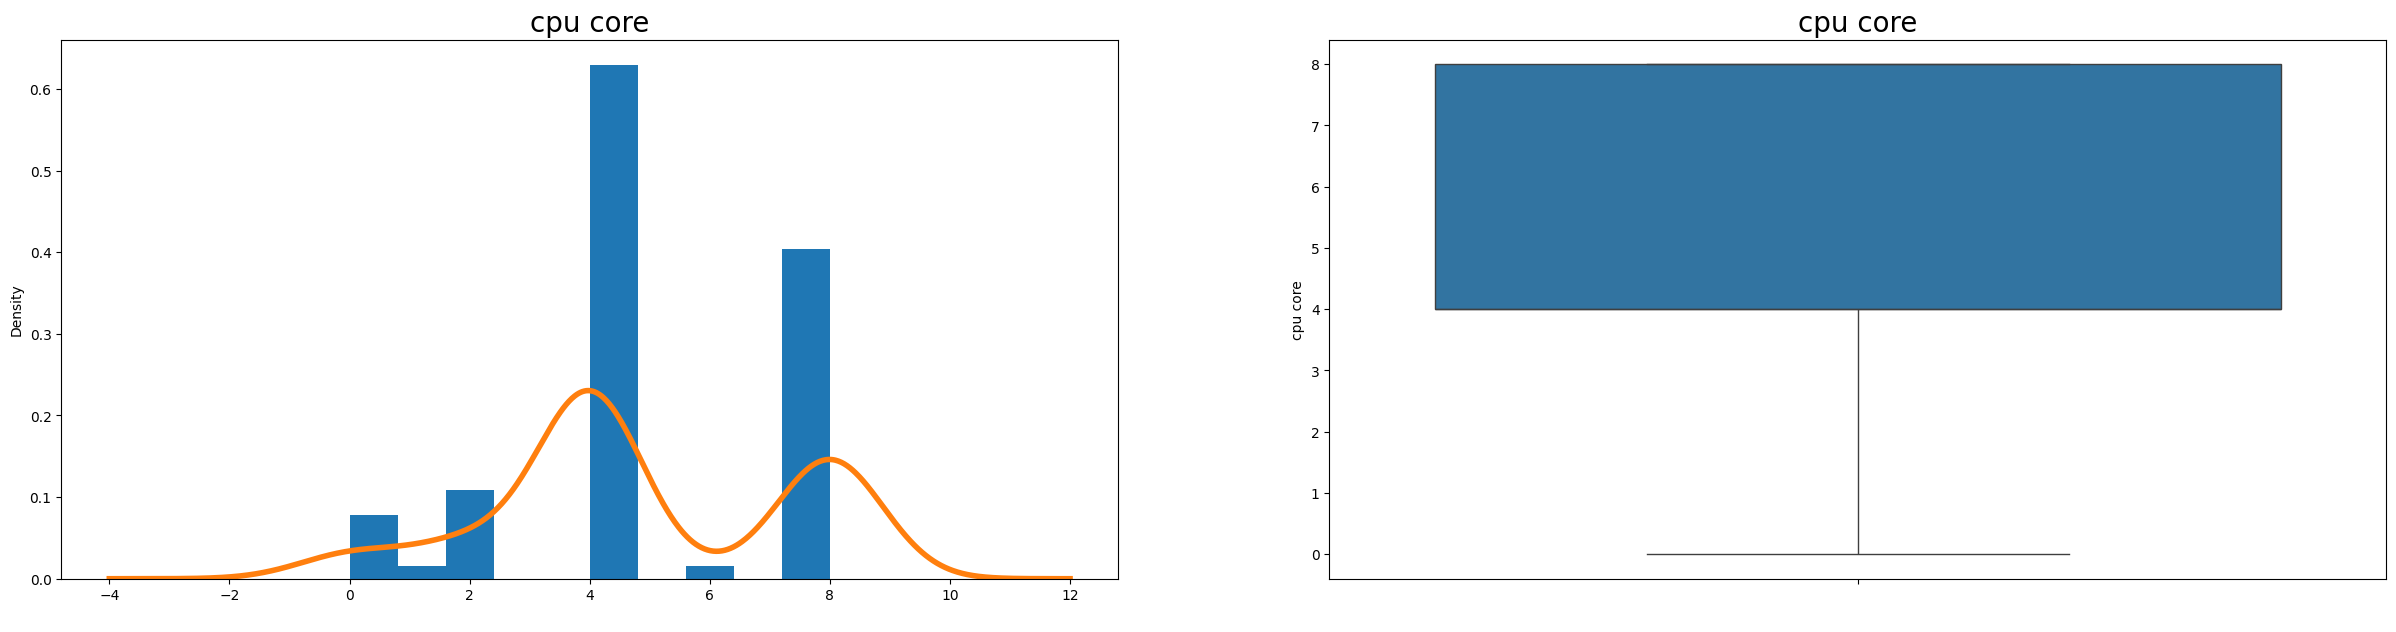

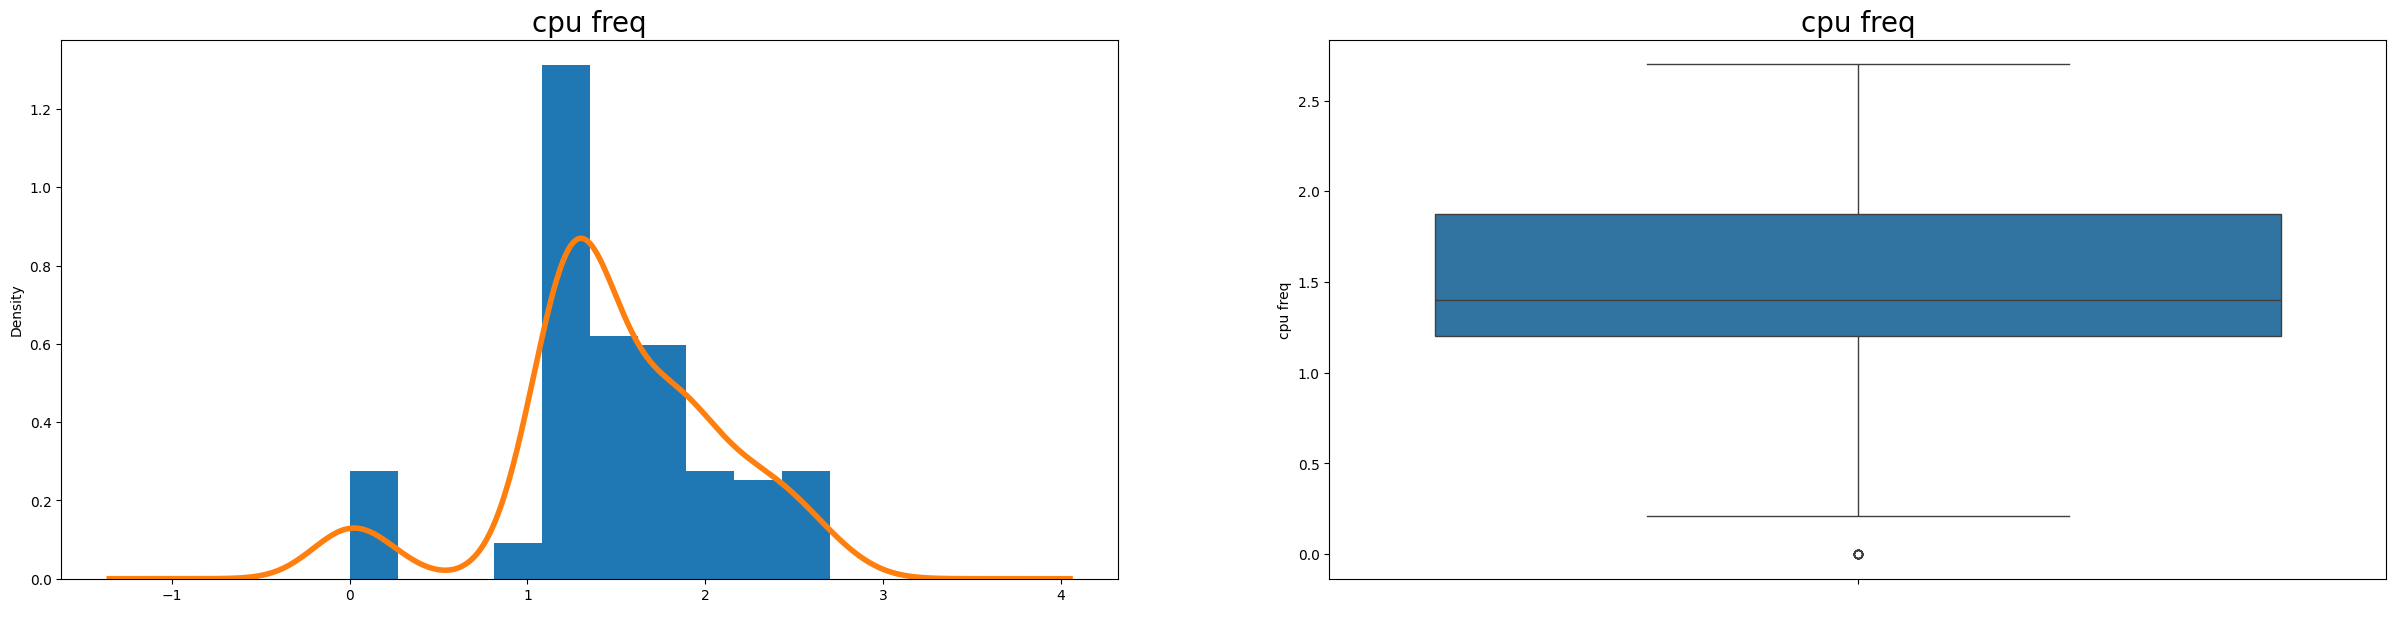

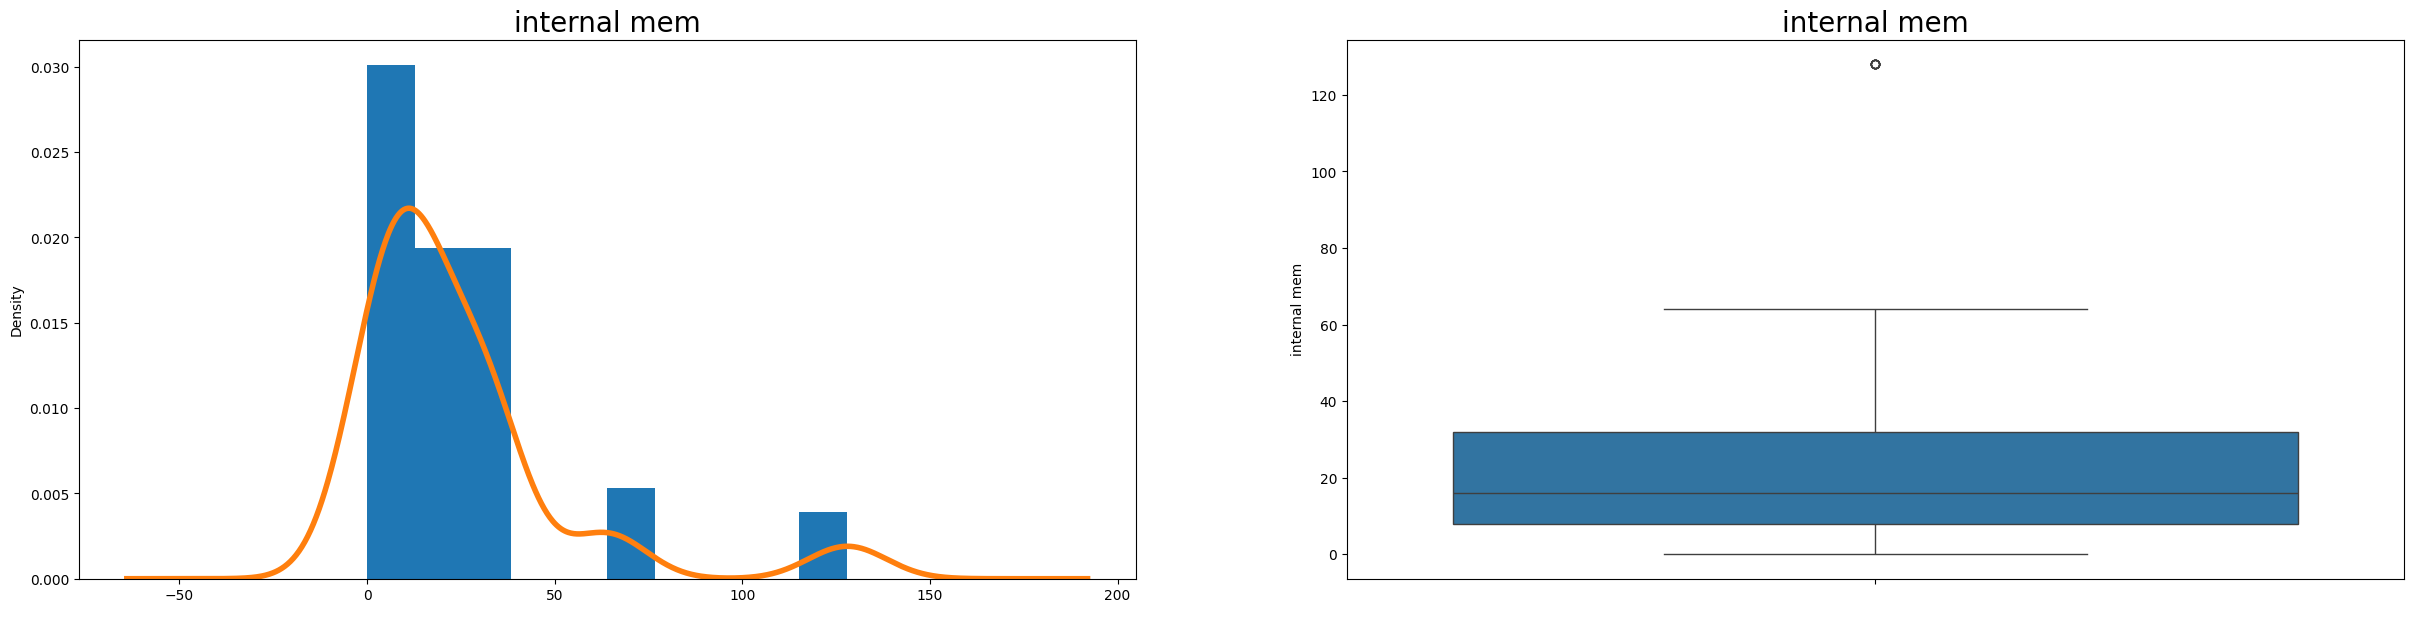

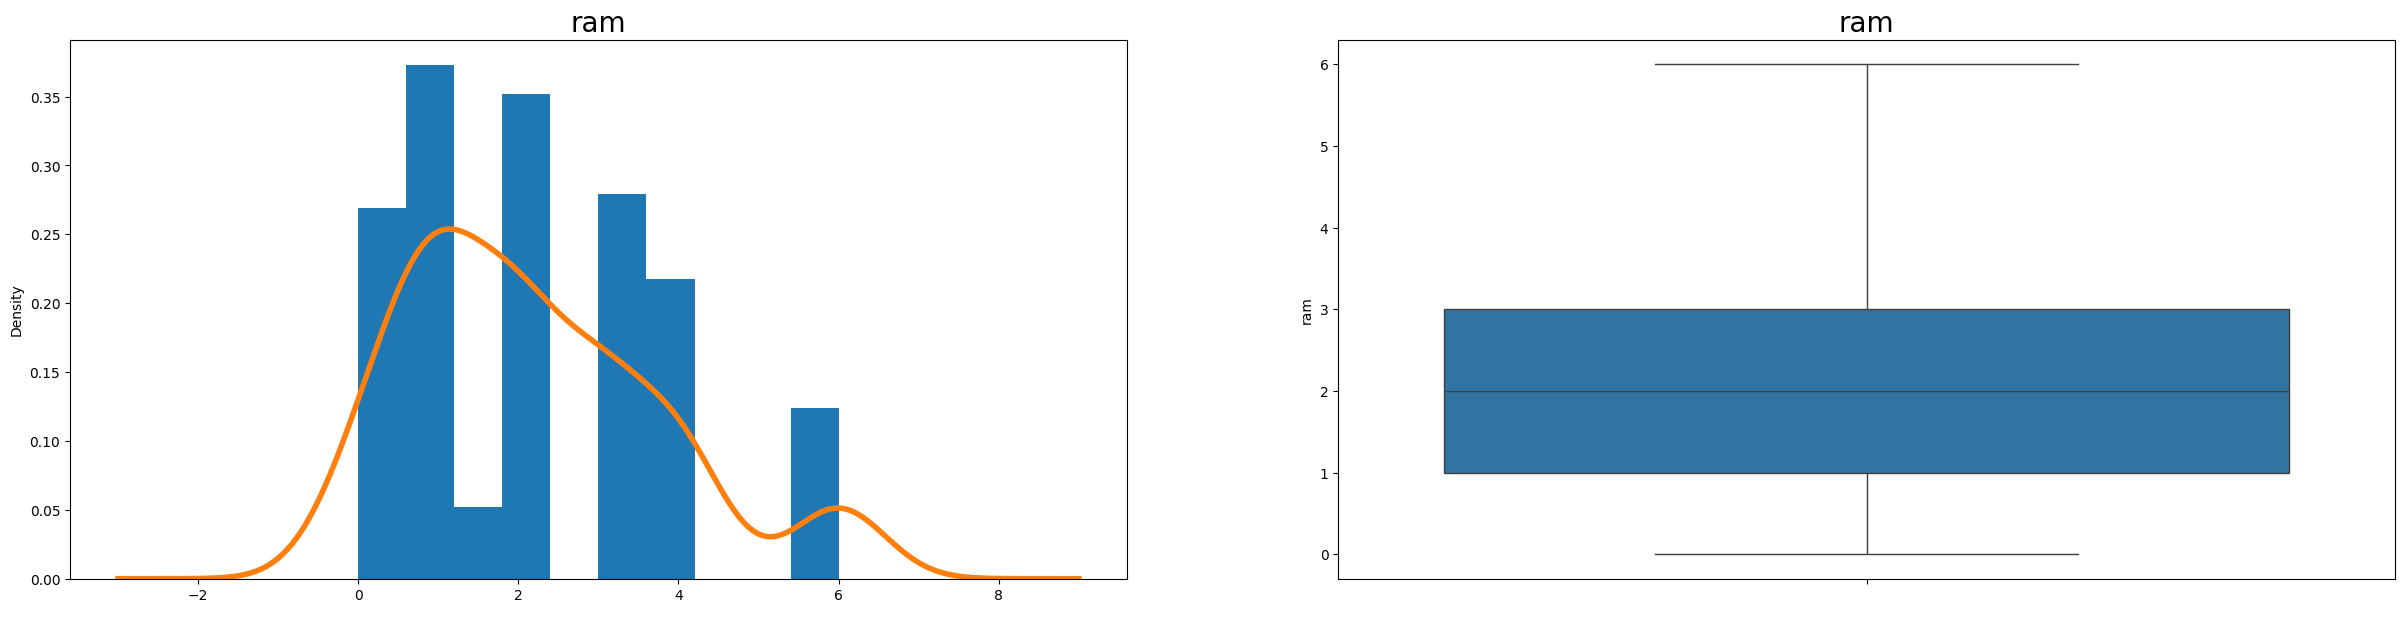

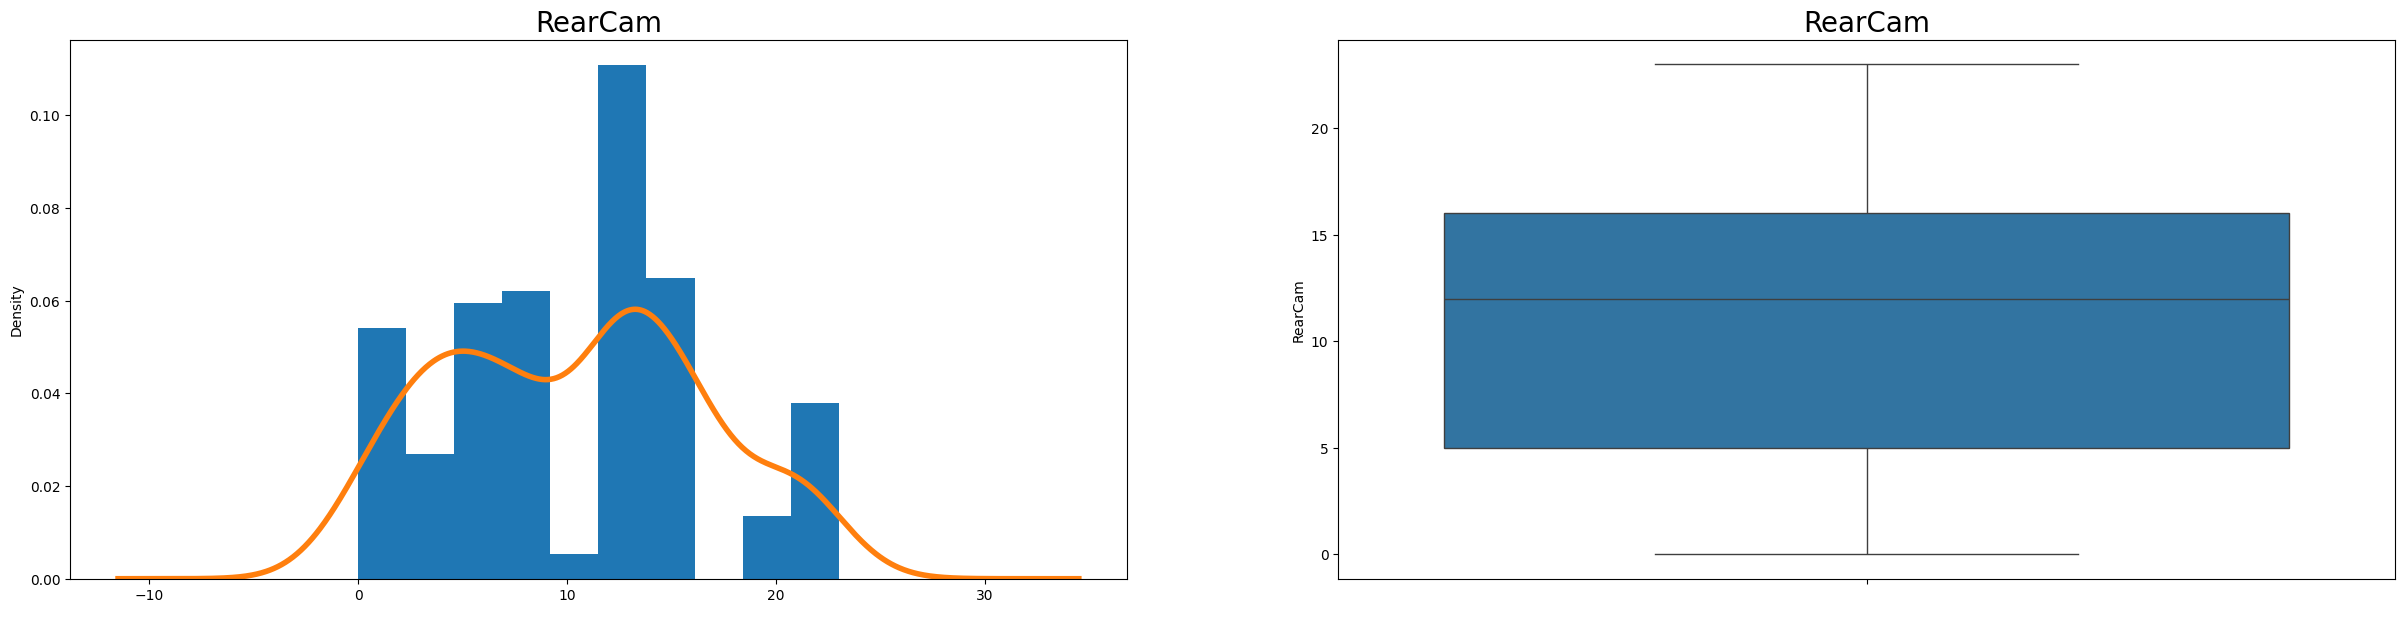

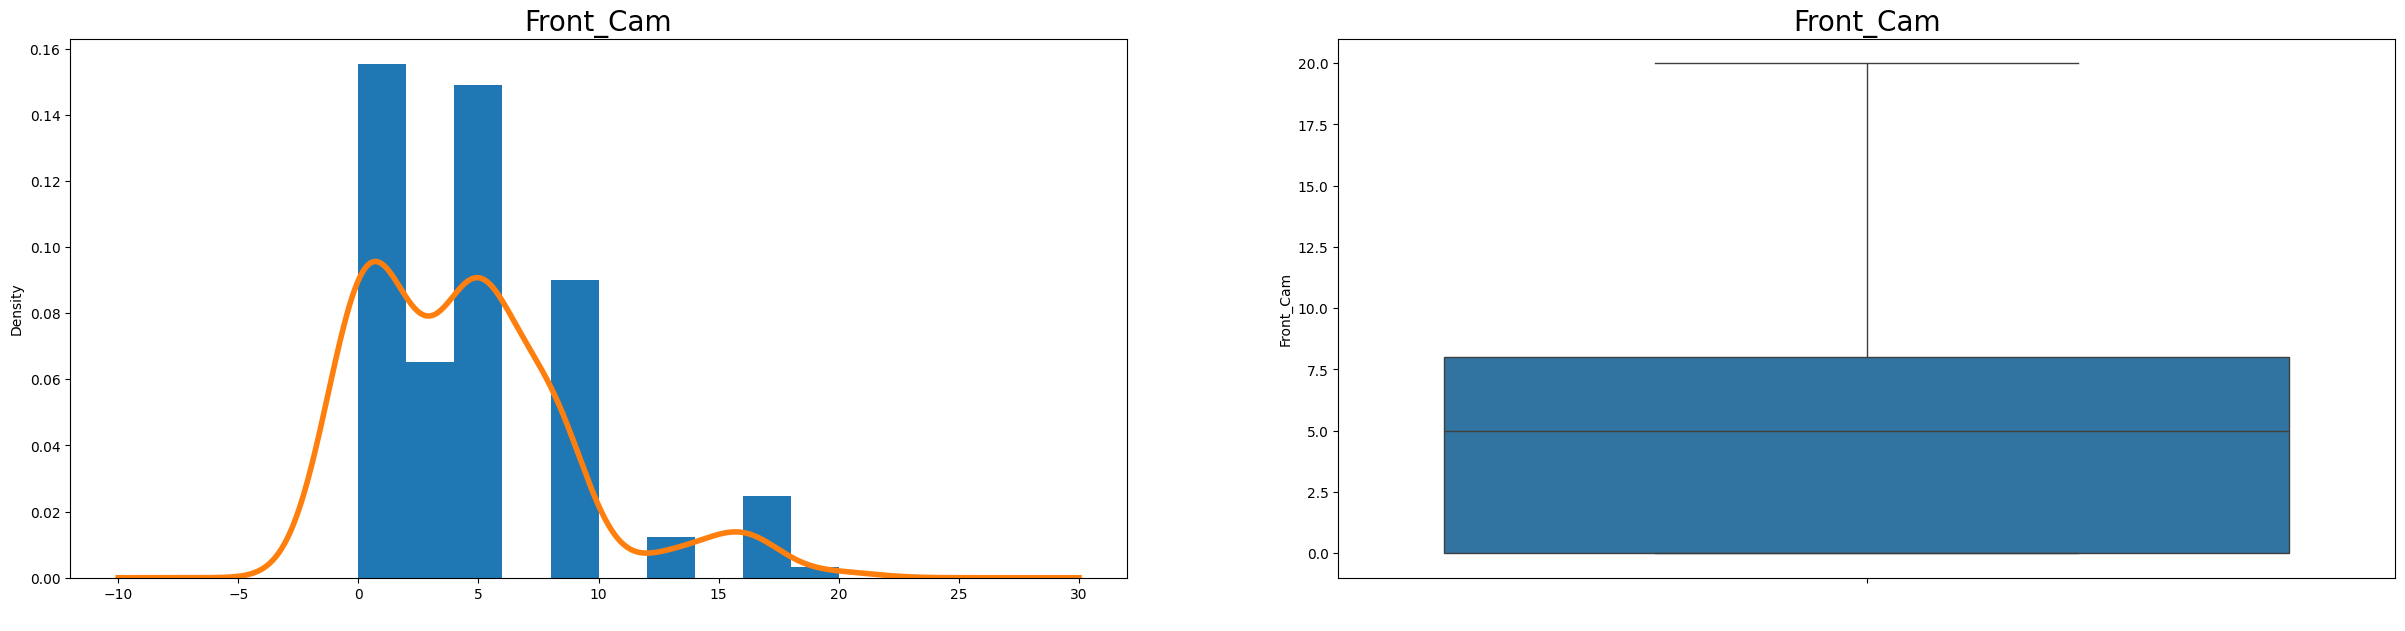

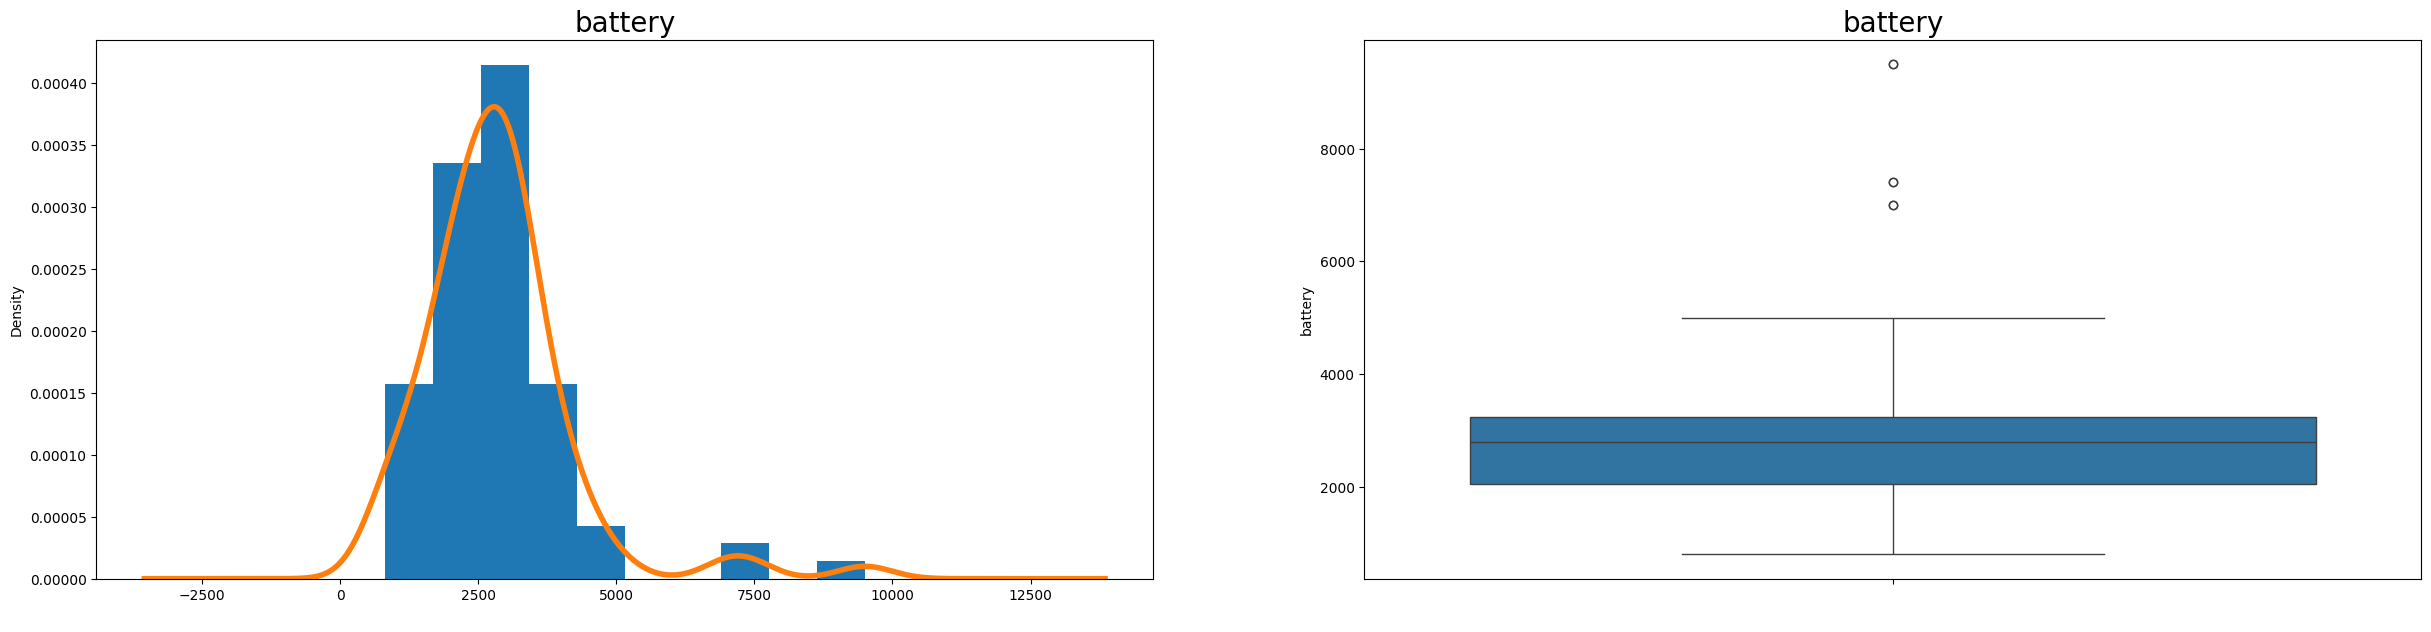

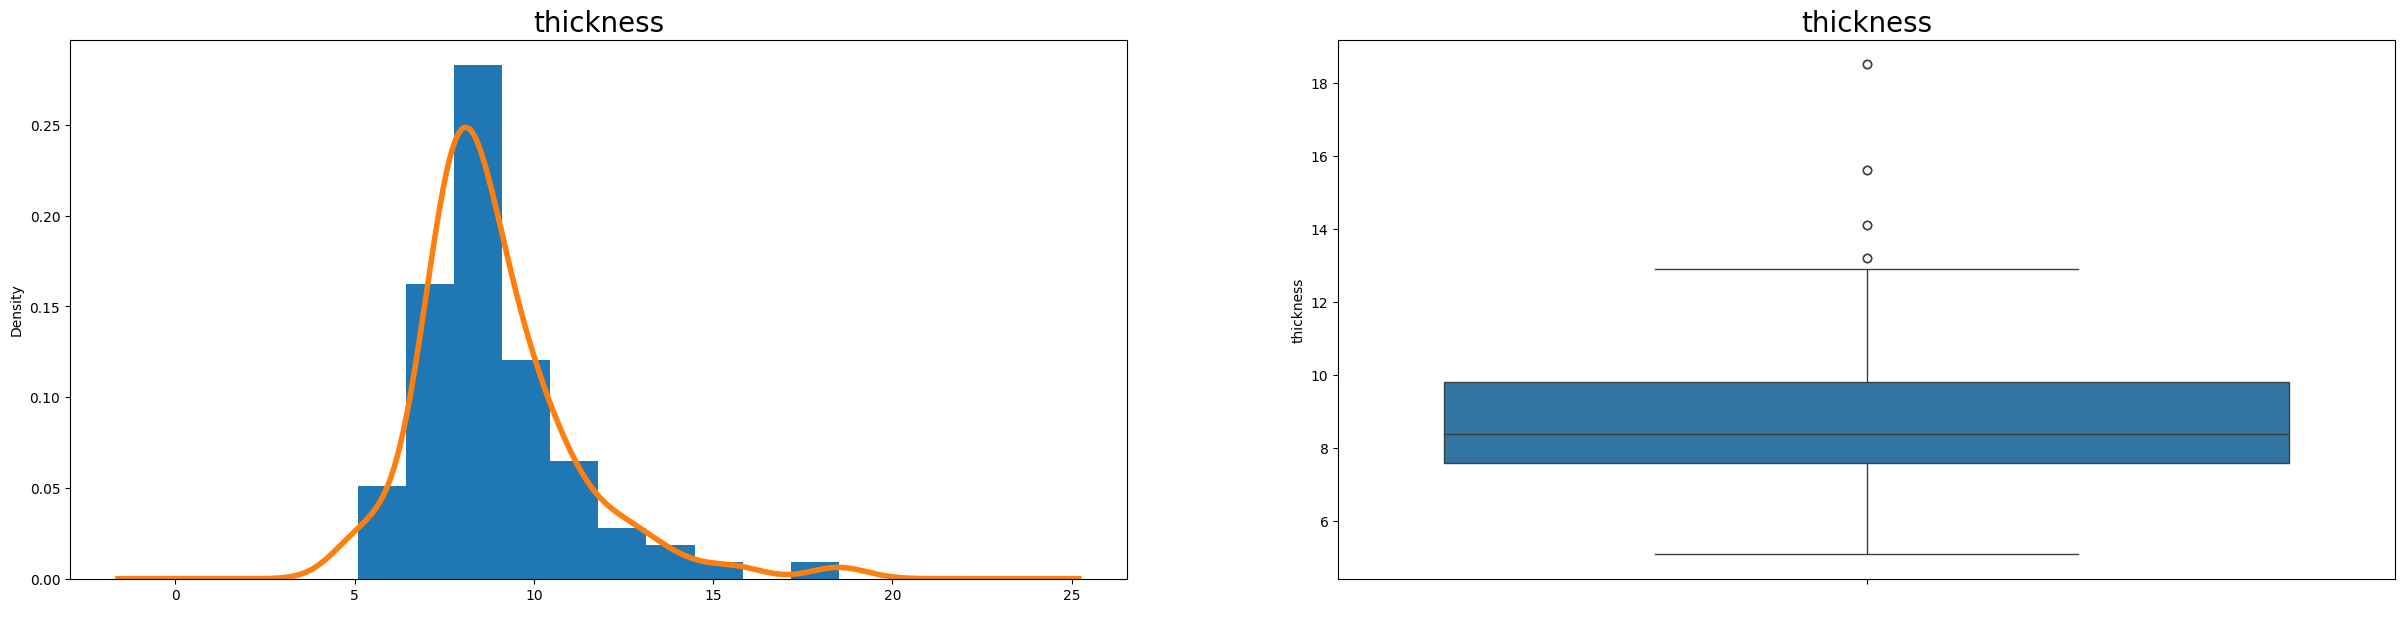

In [ ]:
df_columns = df.columns
df_columns
for index,col in enumerate(df_columns):
    plt.figure(figsize = (30,7))
    plt.subplot(1,2,1)
    df[col].hist(density=True)
    df[col].plot(kind='kde', linewidth=4)
    plt.xlabel(" ")
    plt.title(col, size = 20)

    plt.subplot(1,2,2)
    sns.boxplot(y = df[col])
    plt.title(col, size = 20)
    plt.show()


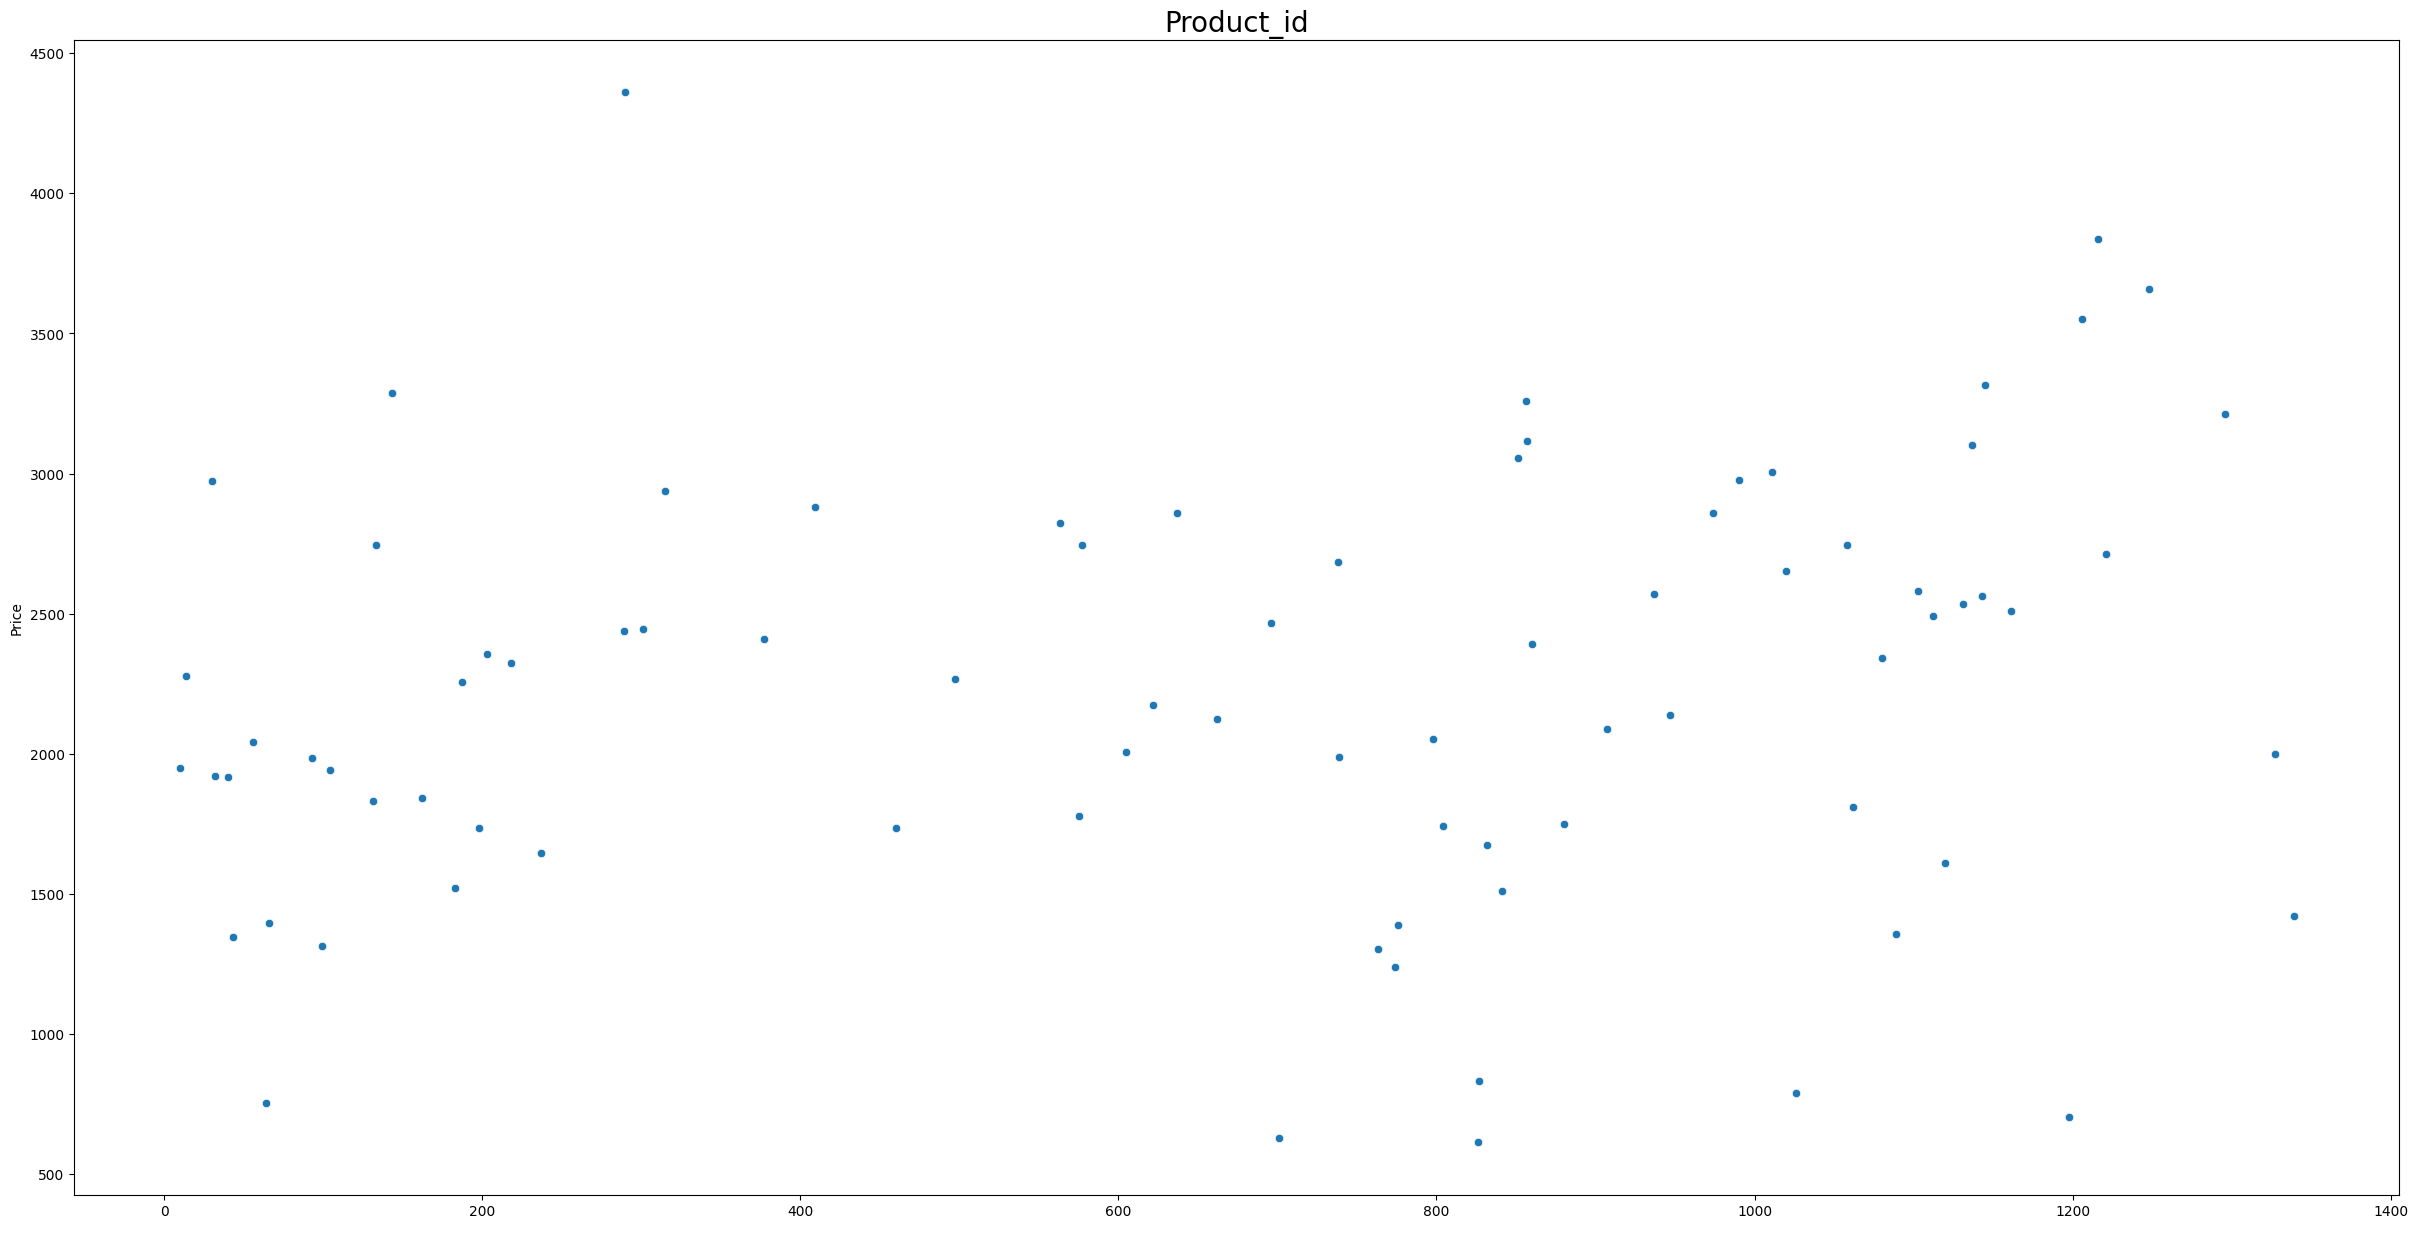

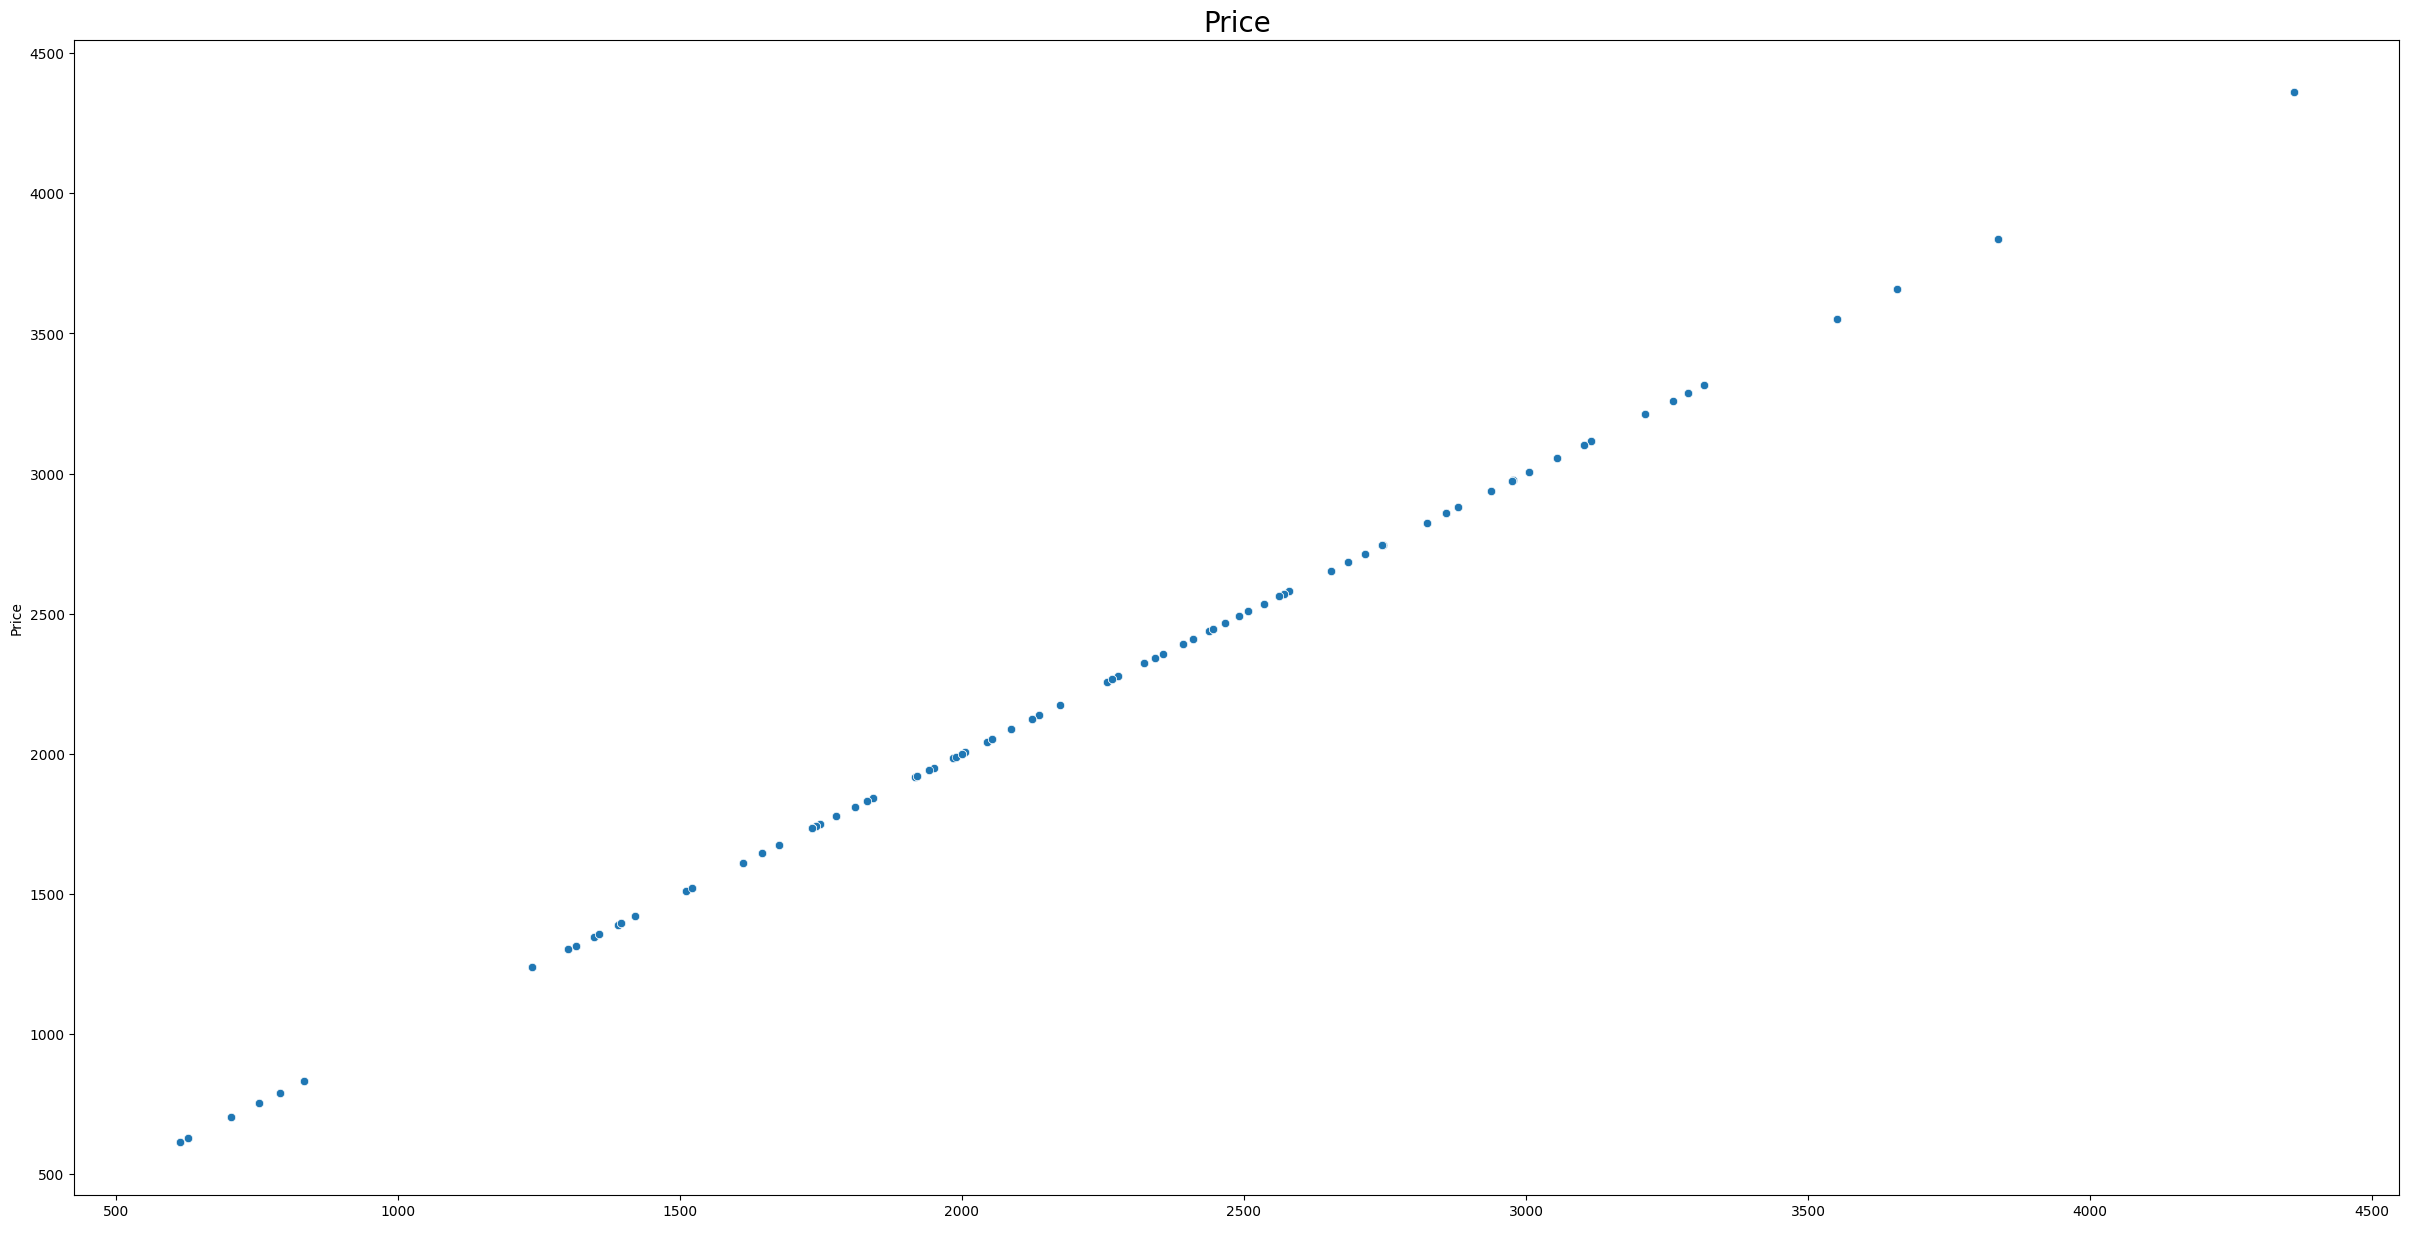

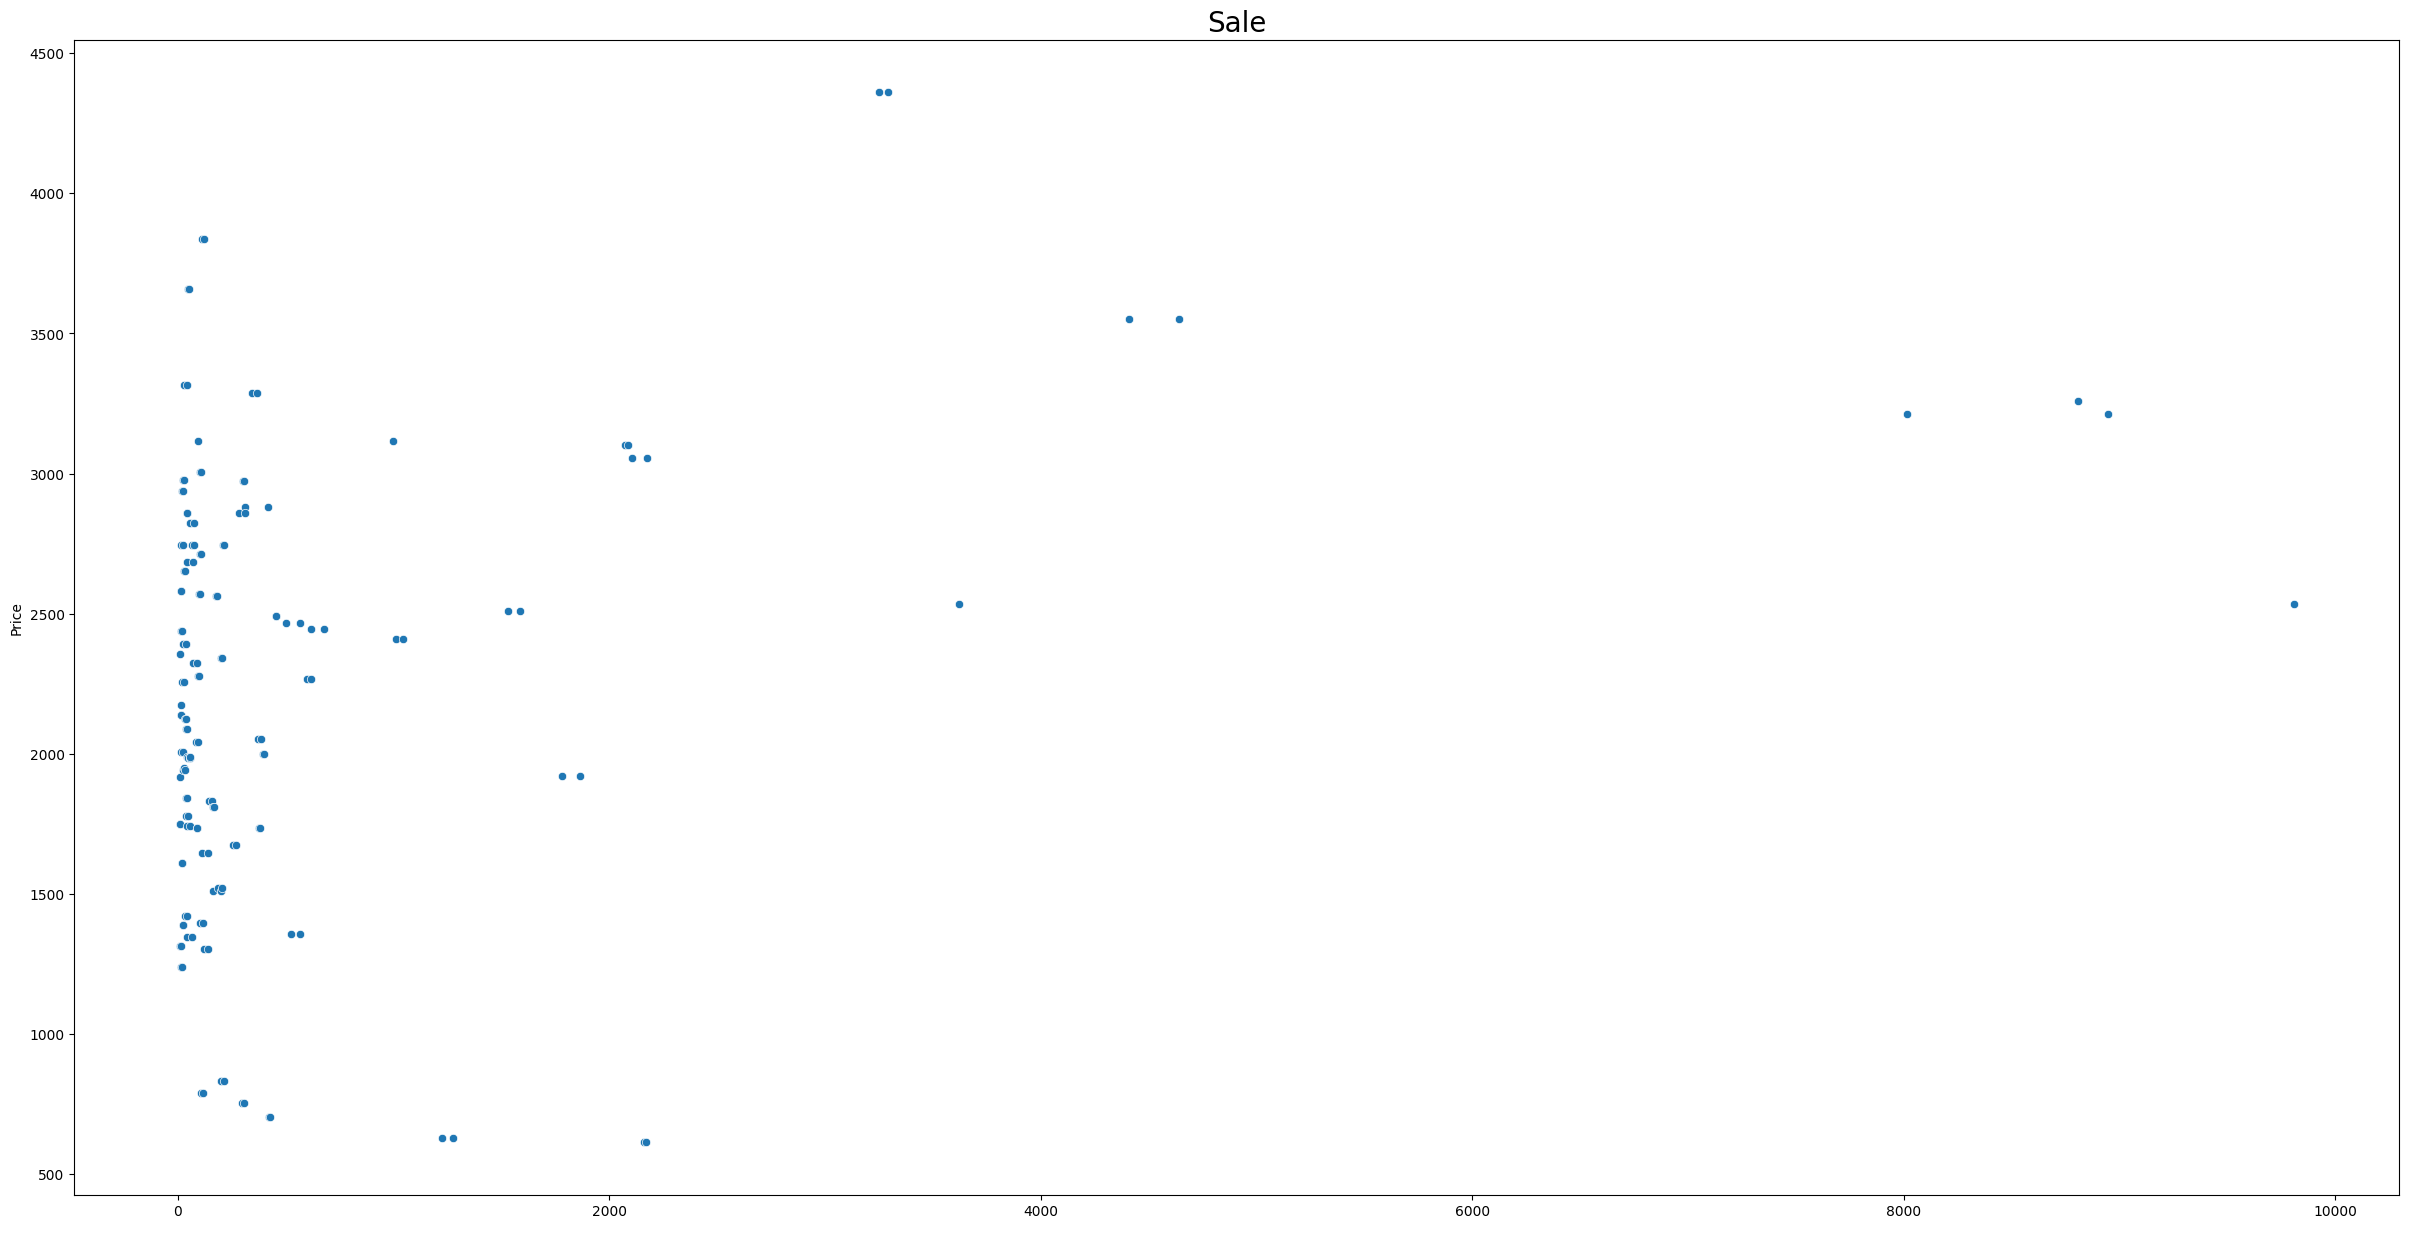

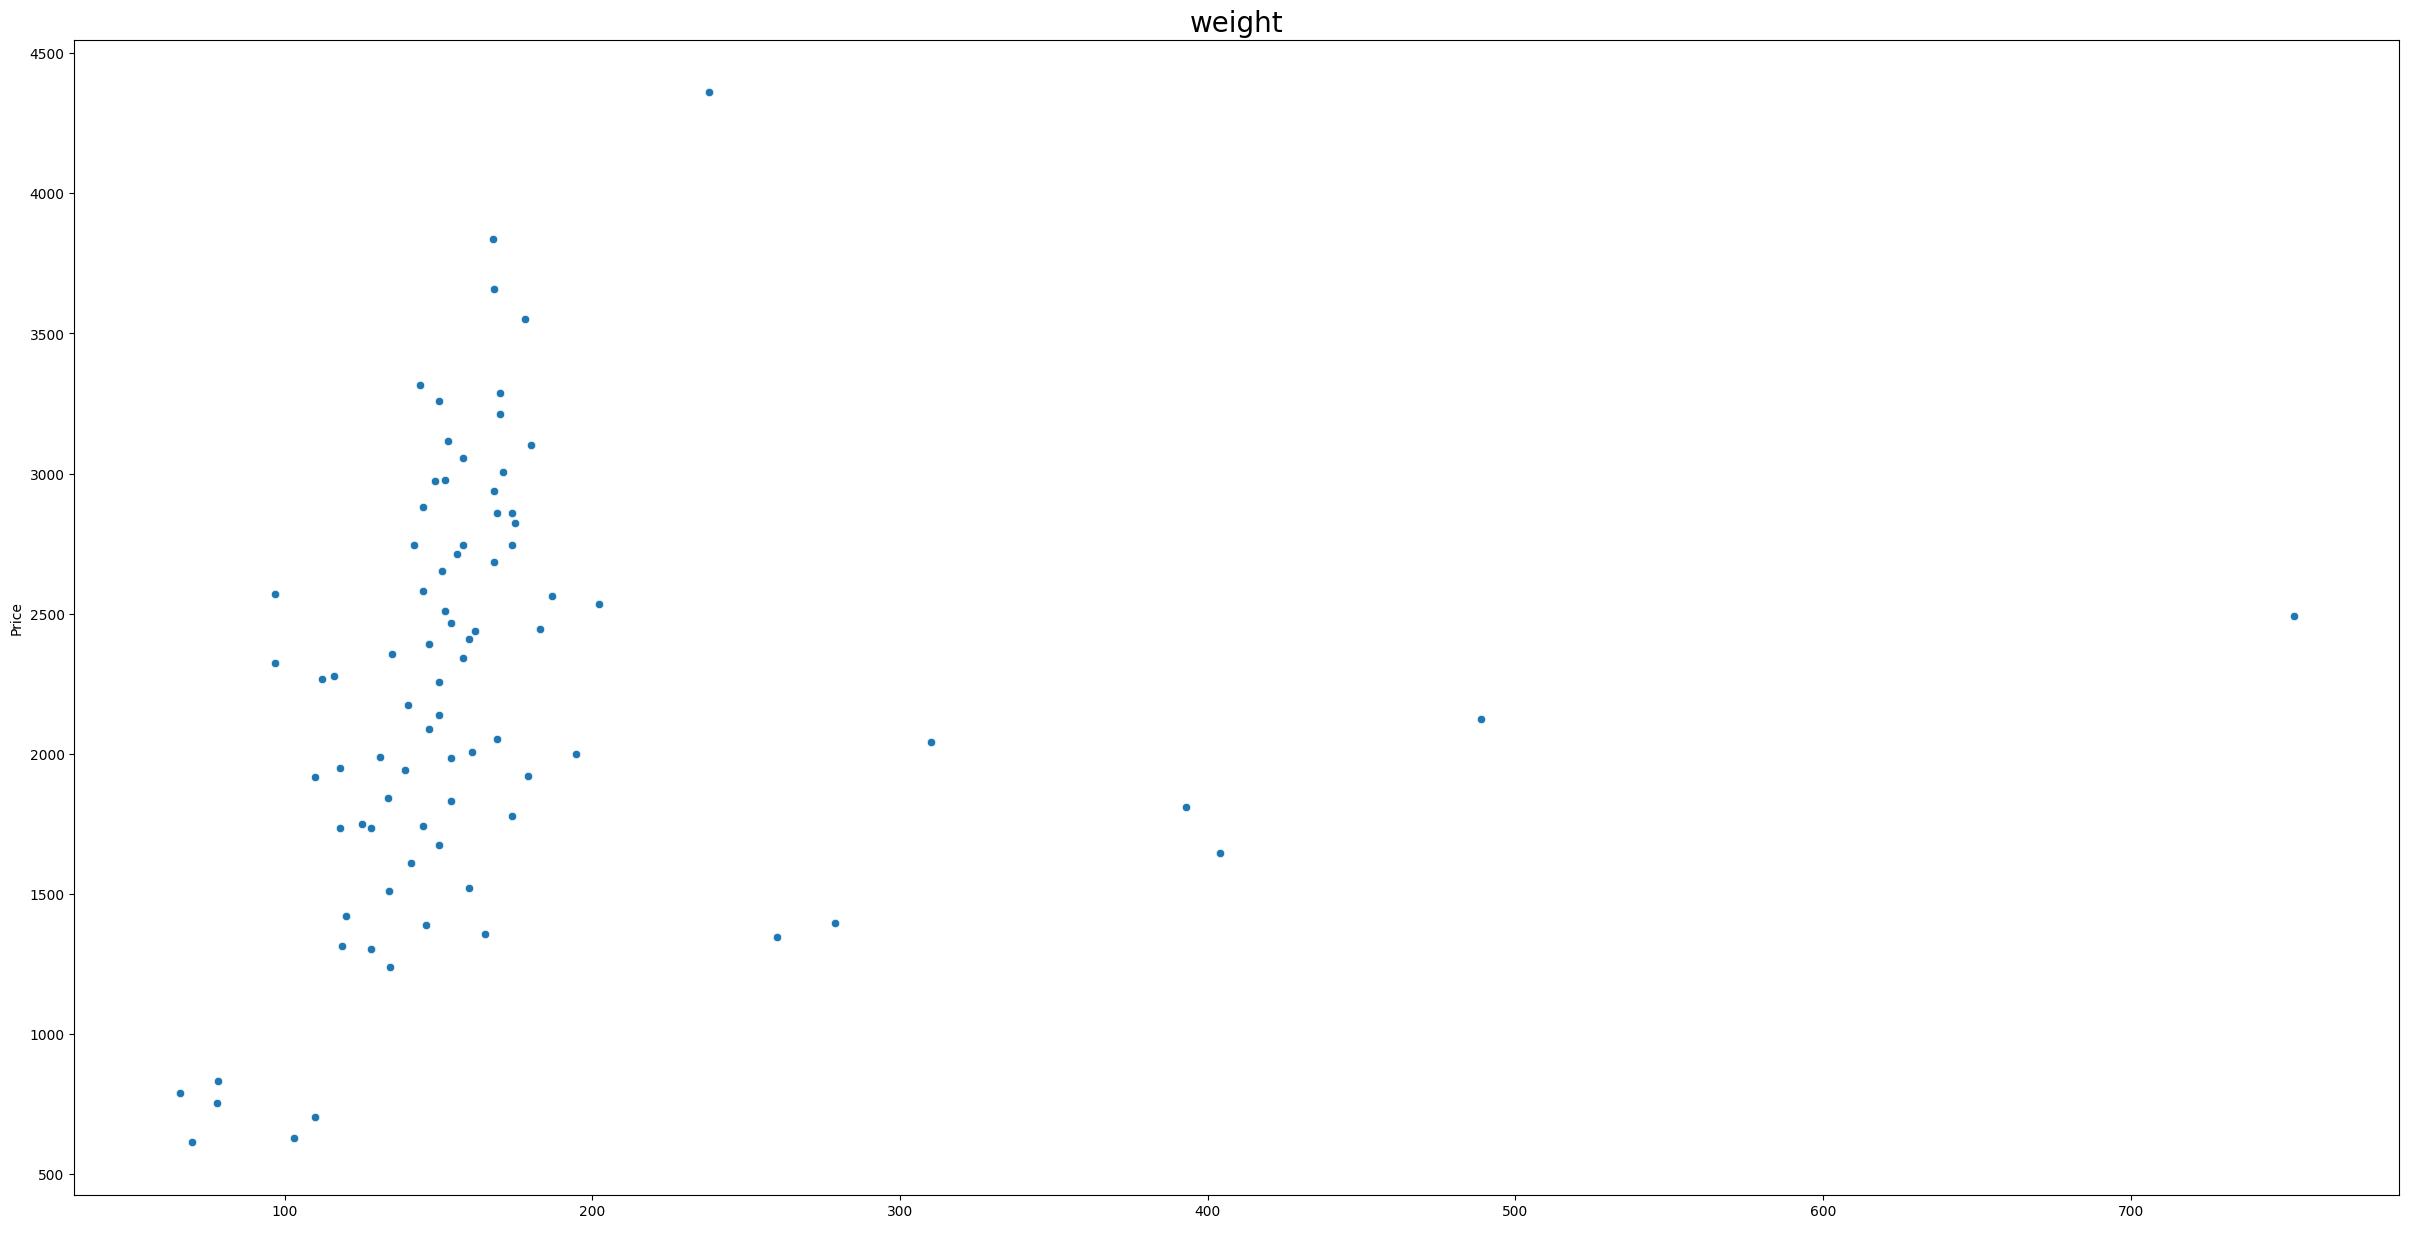

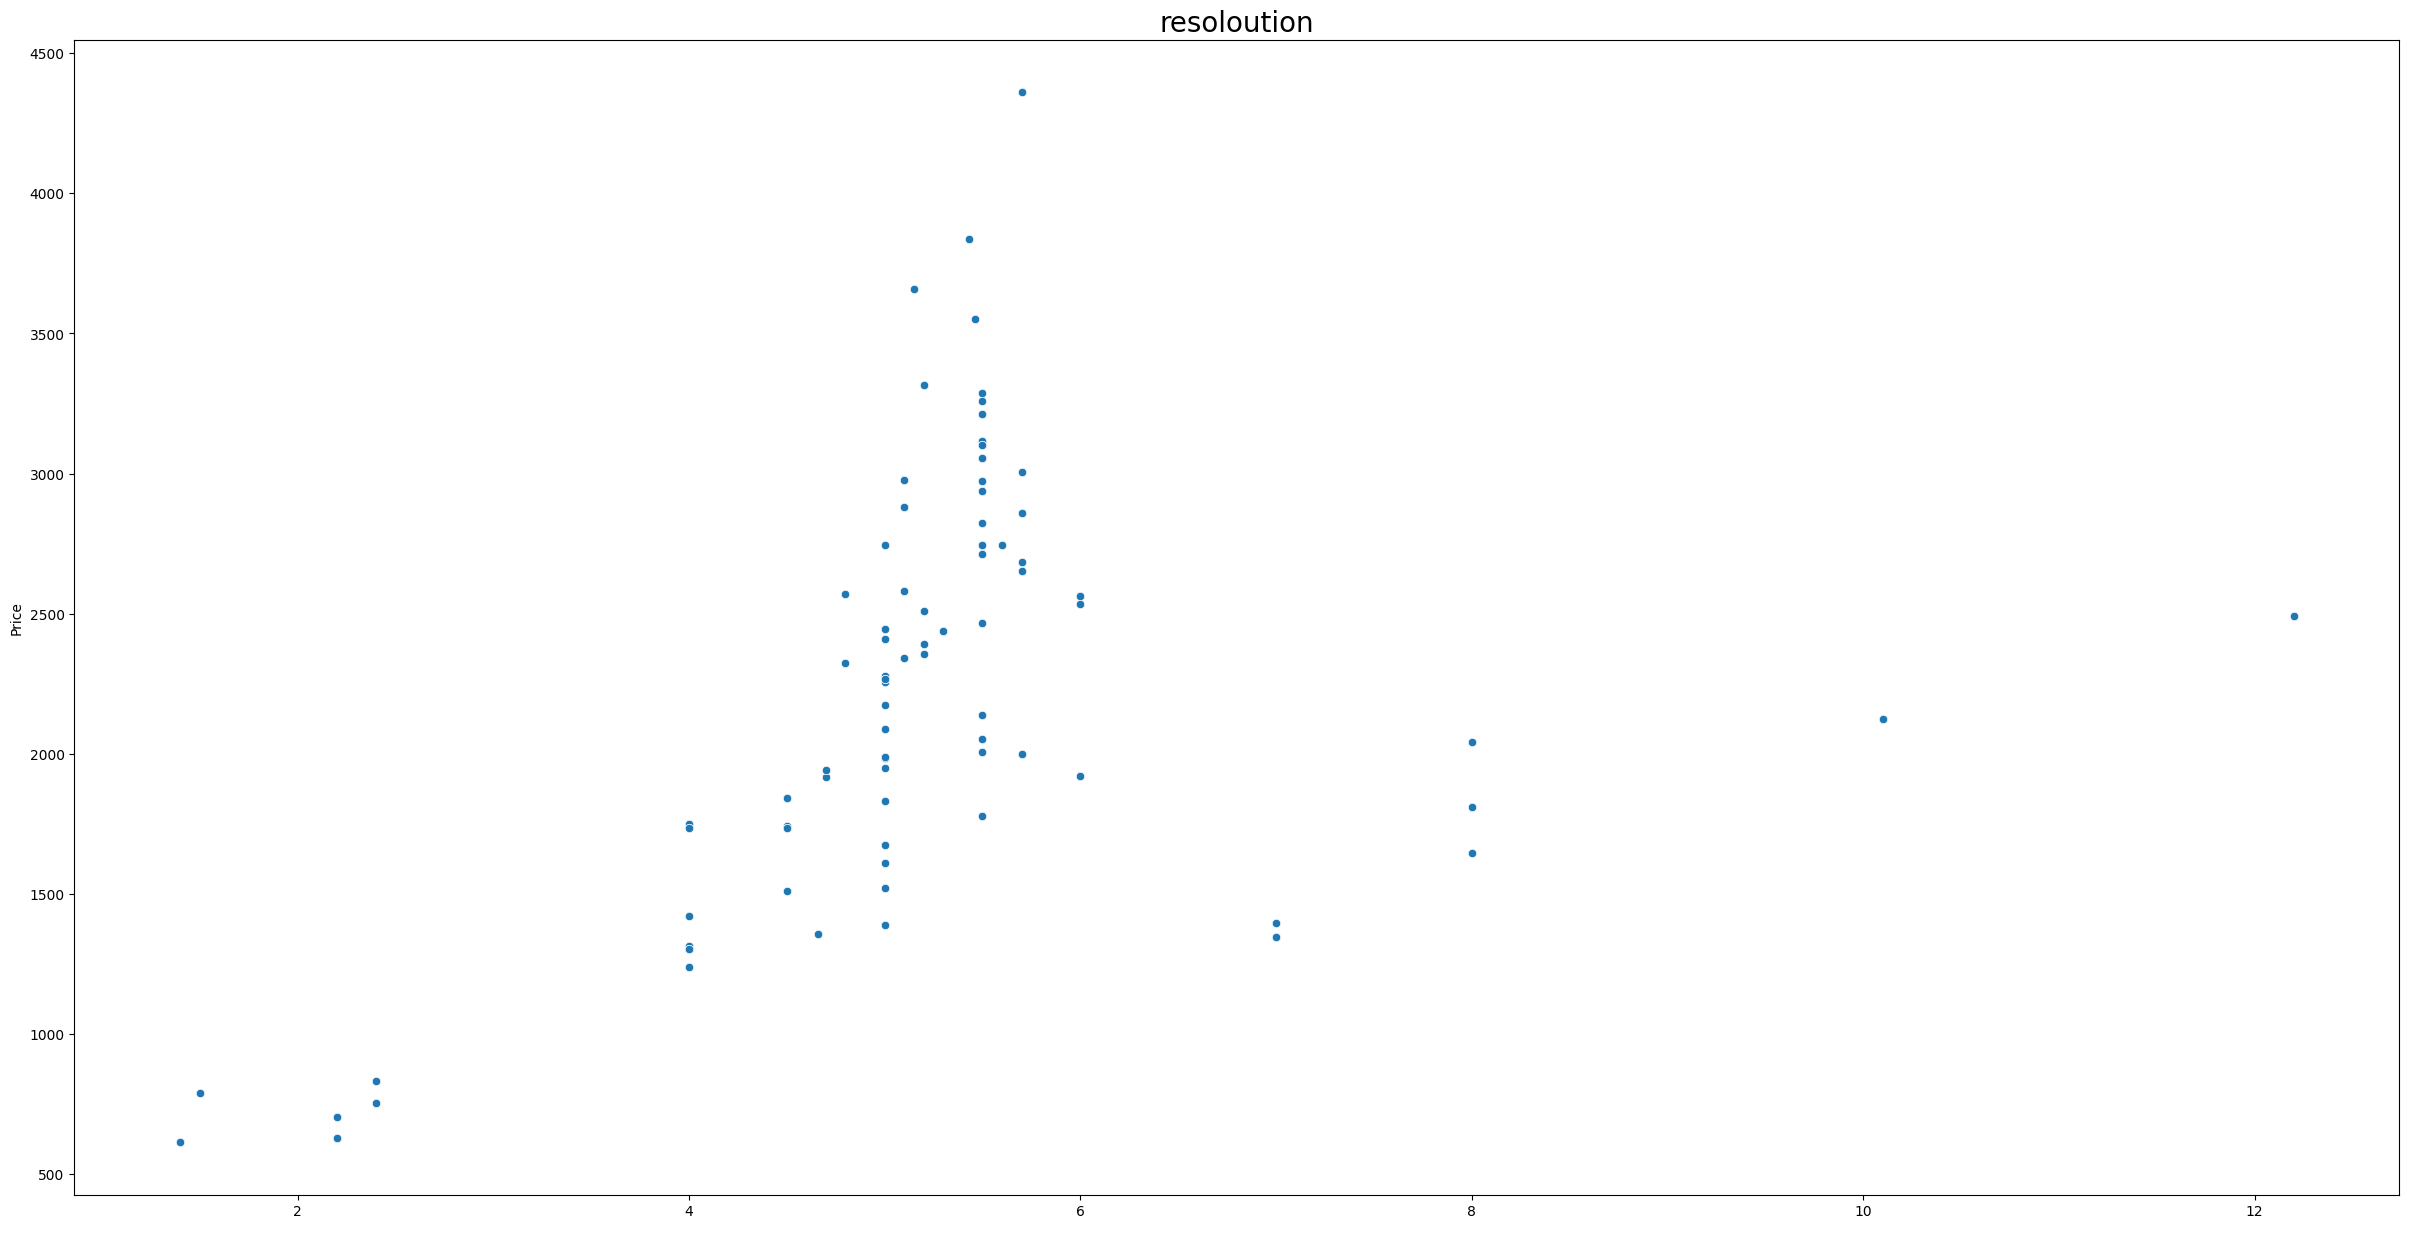

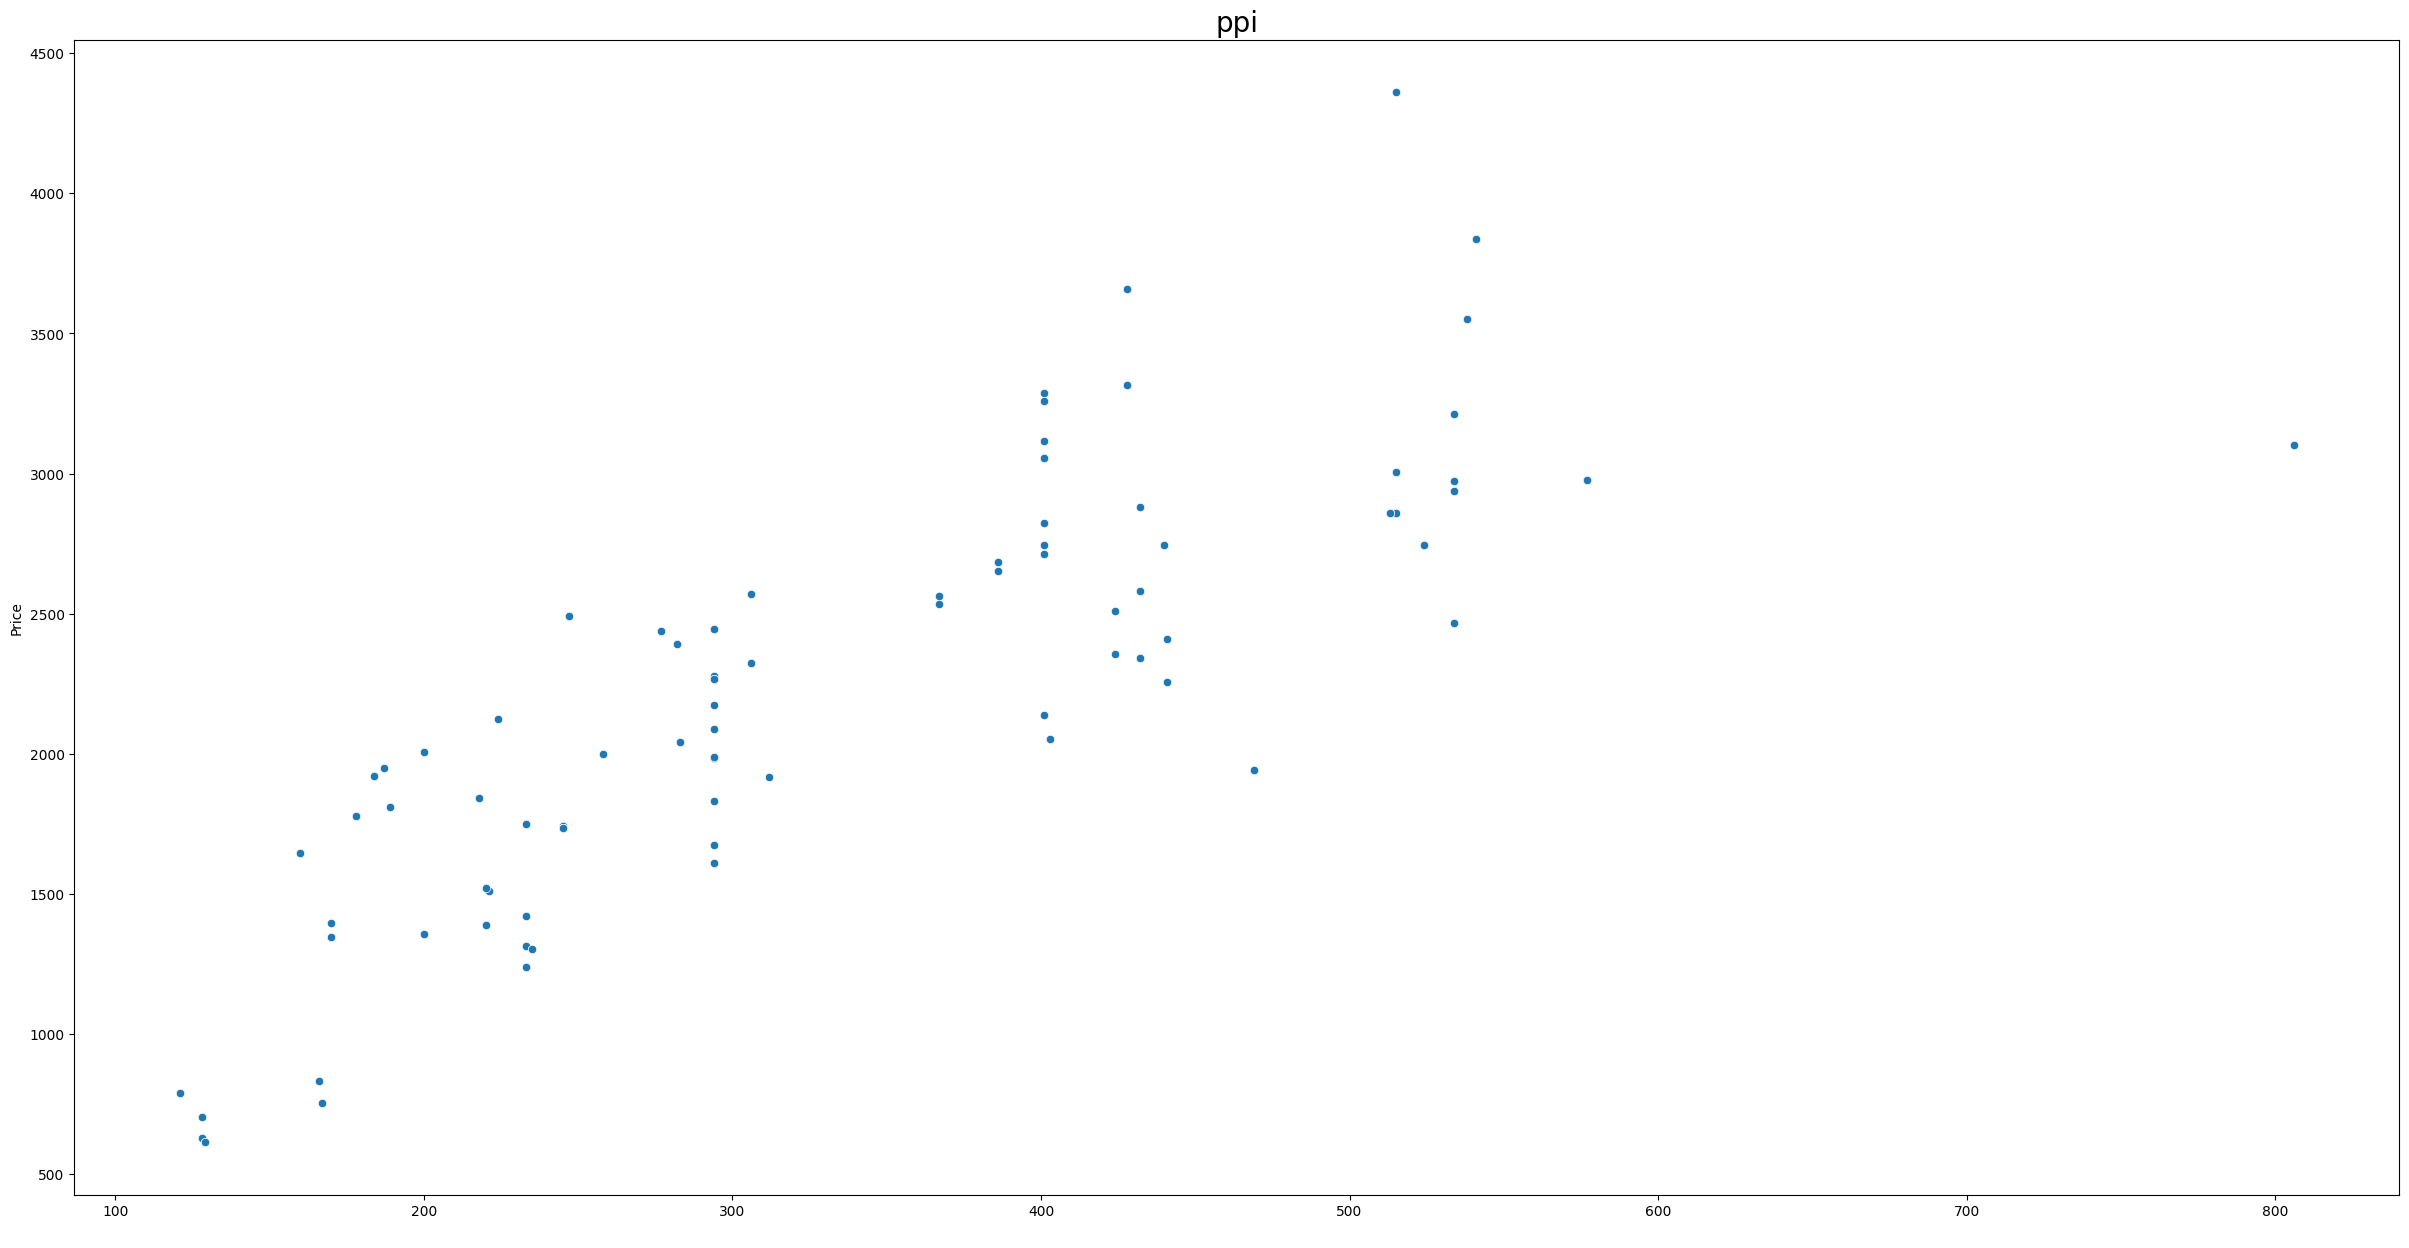

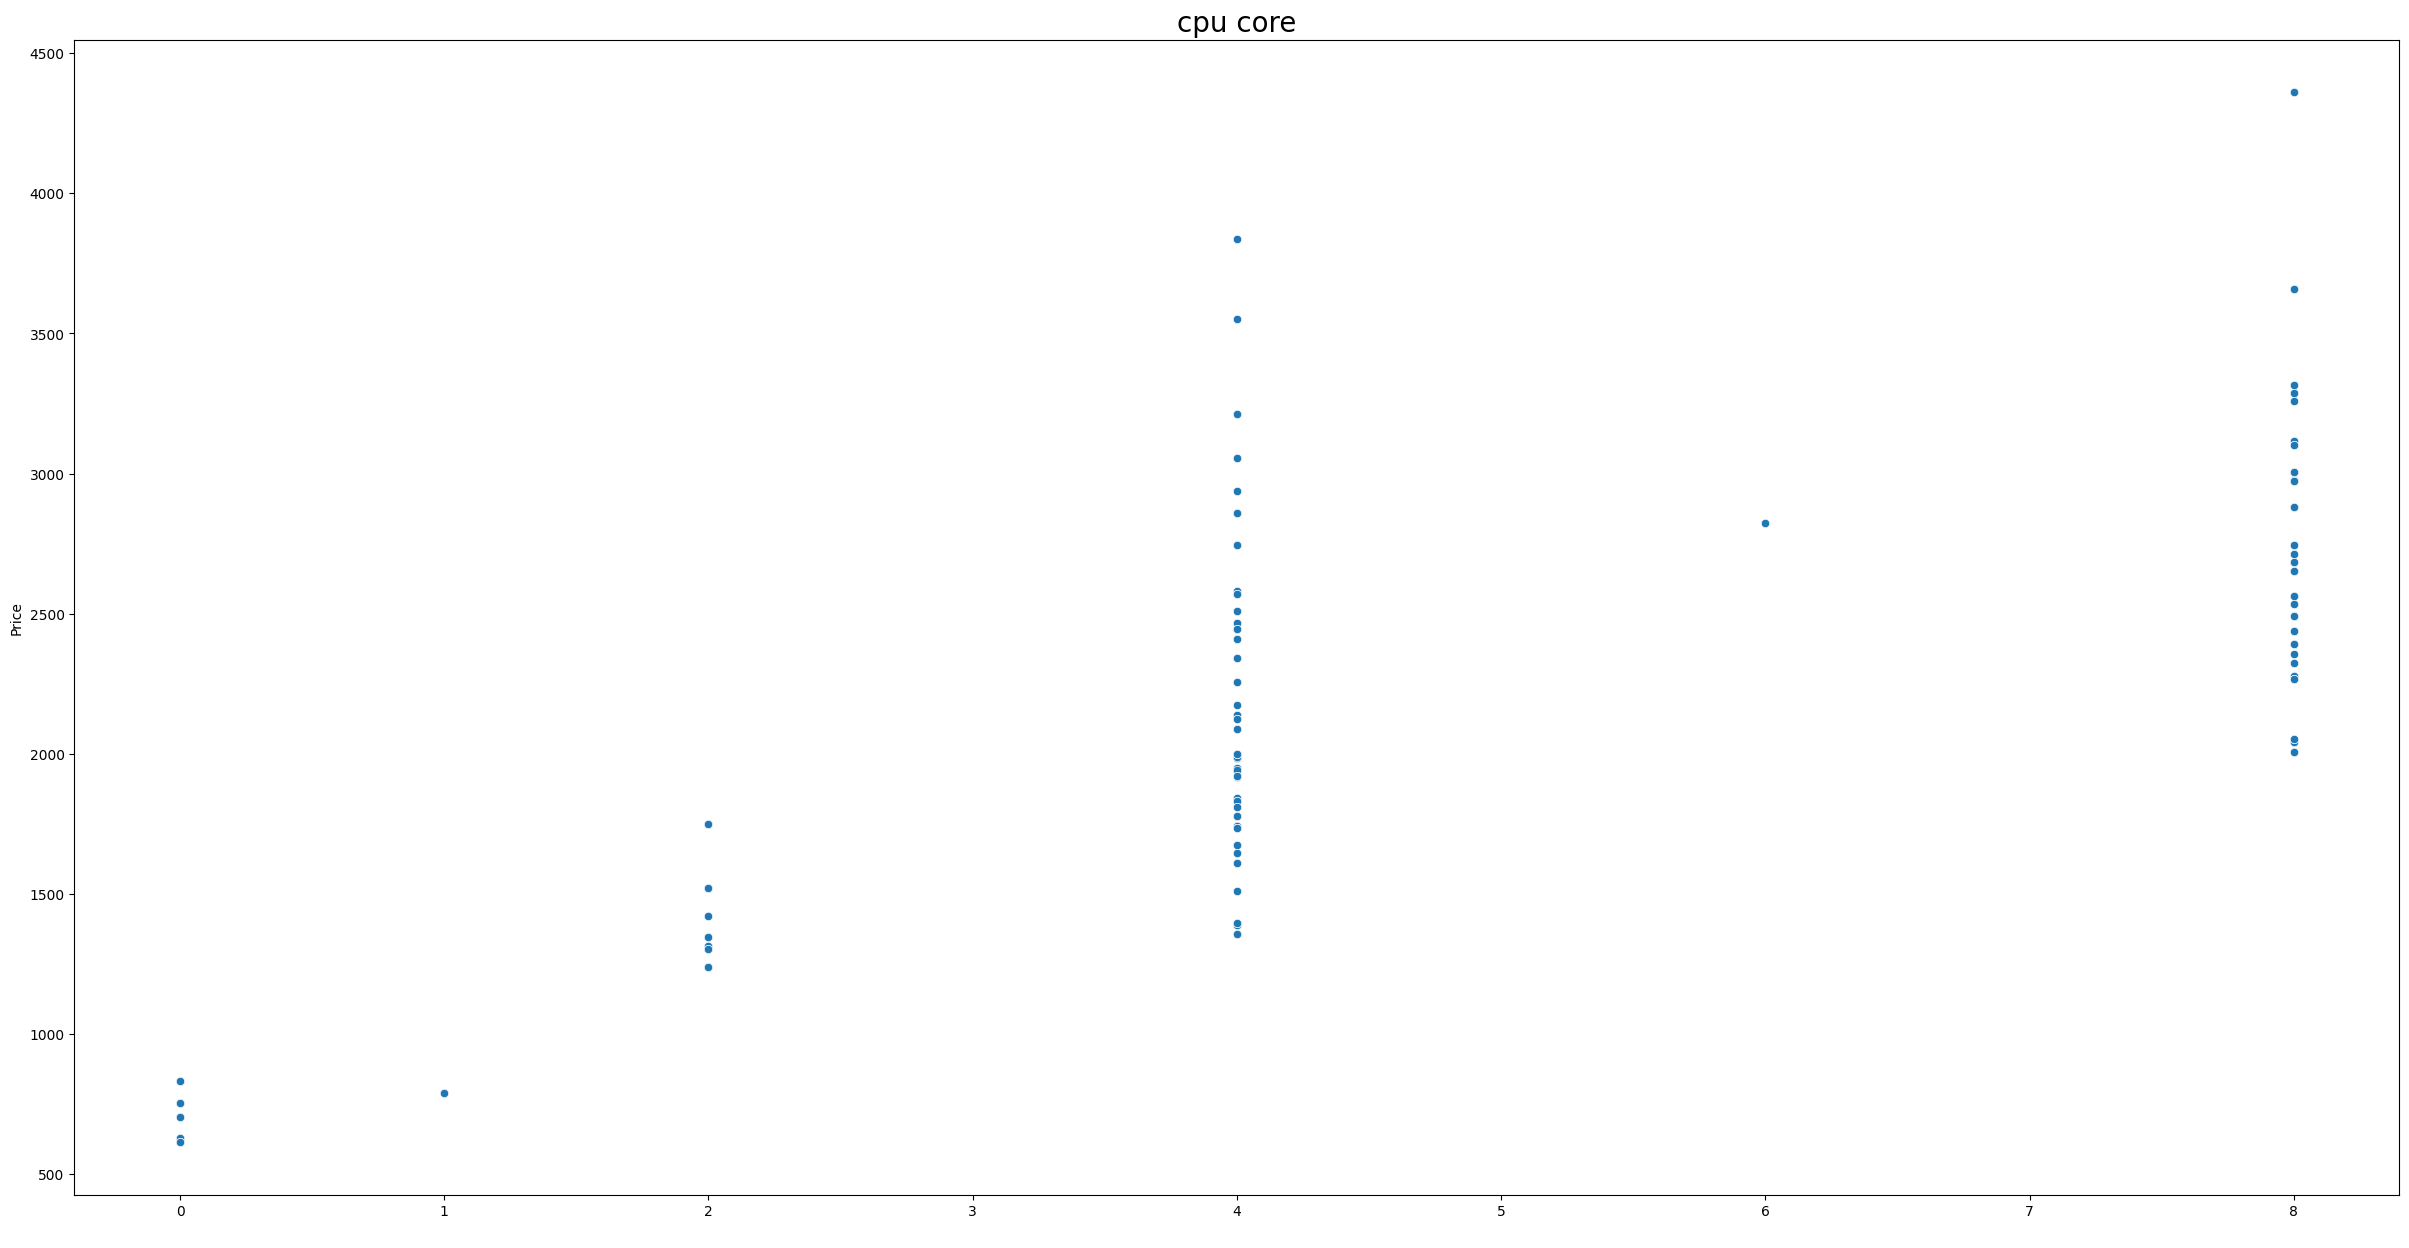

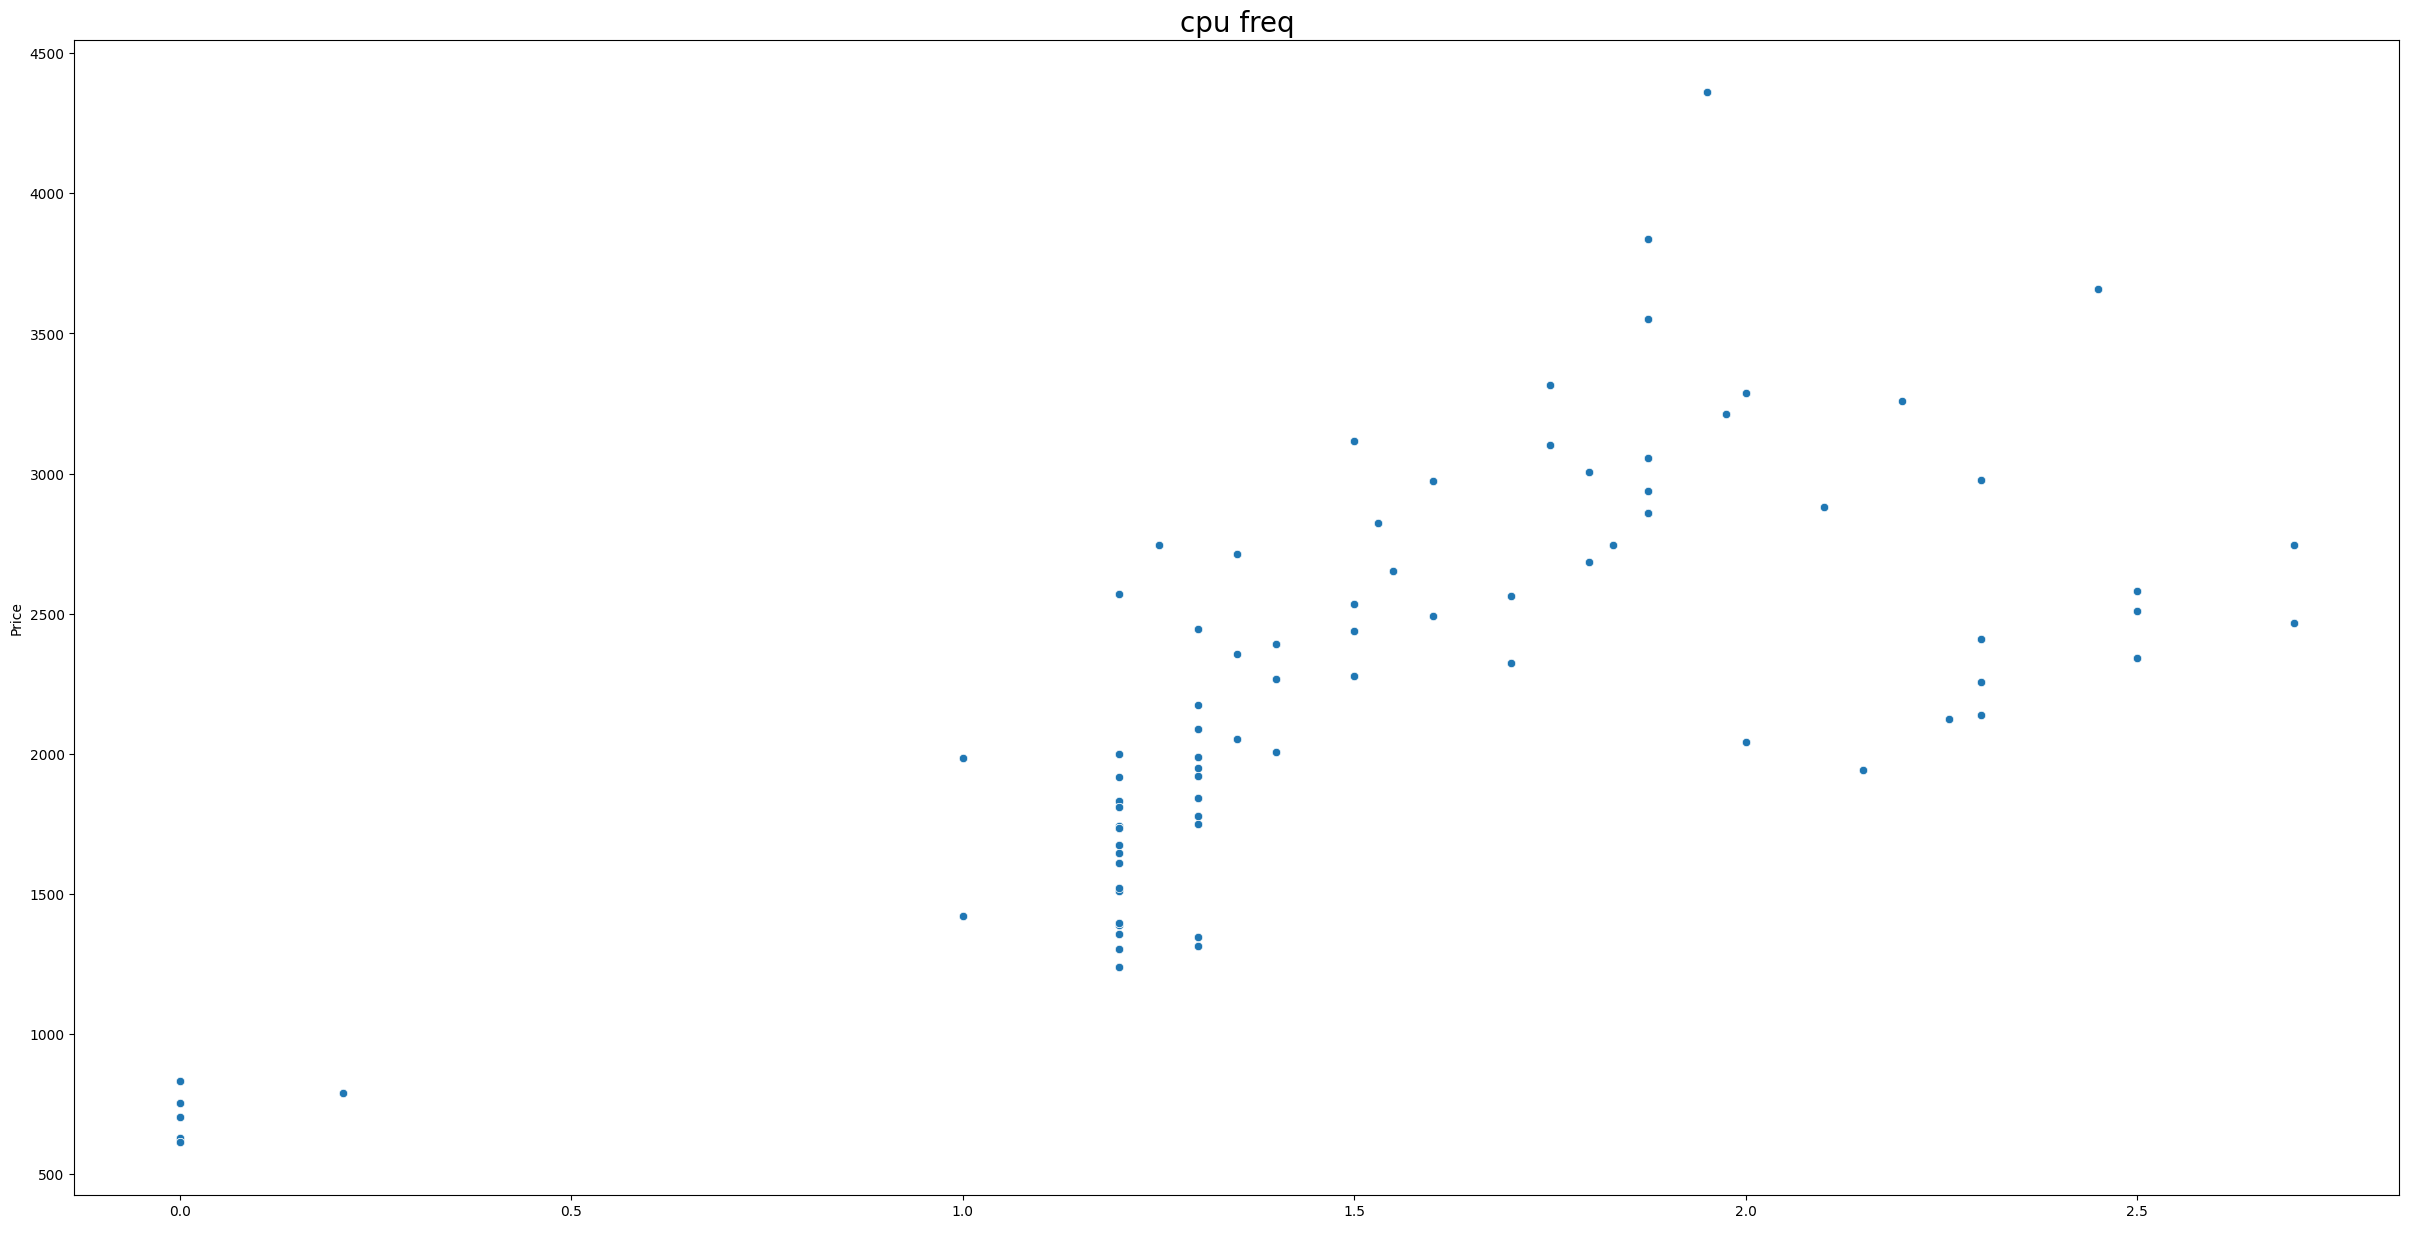

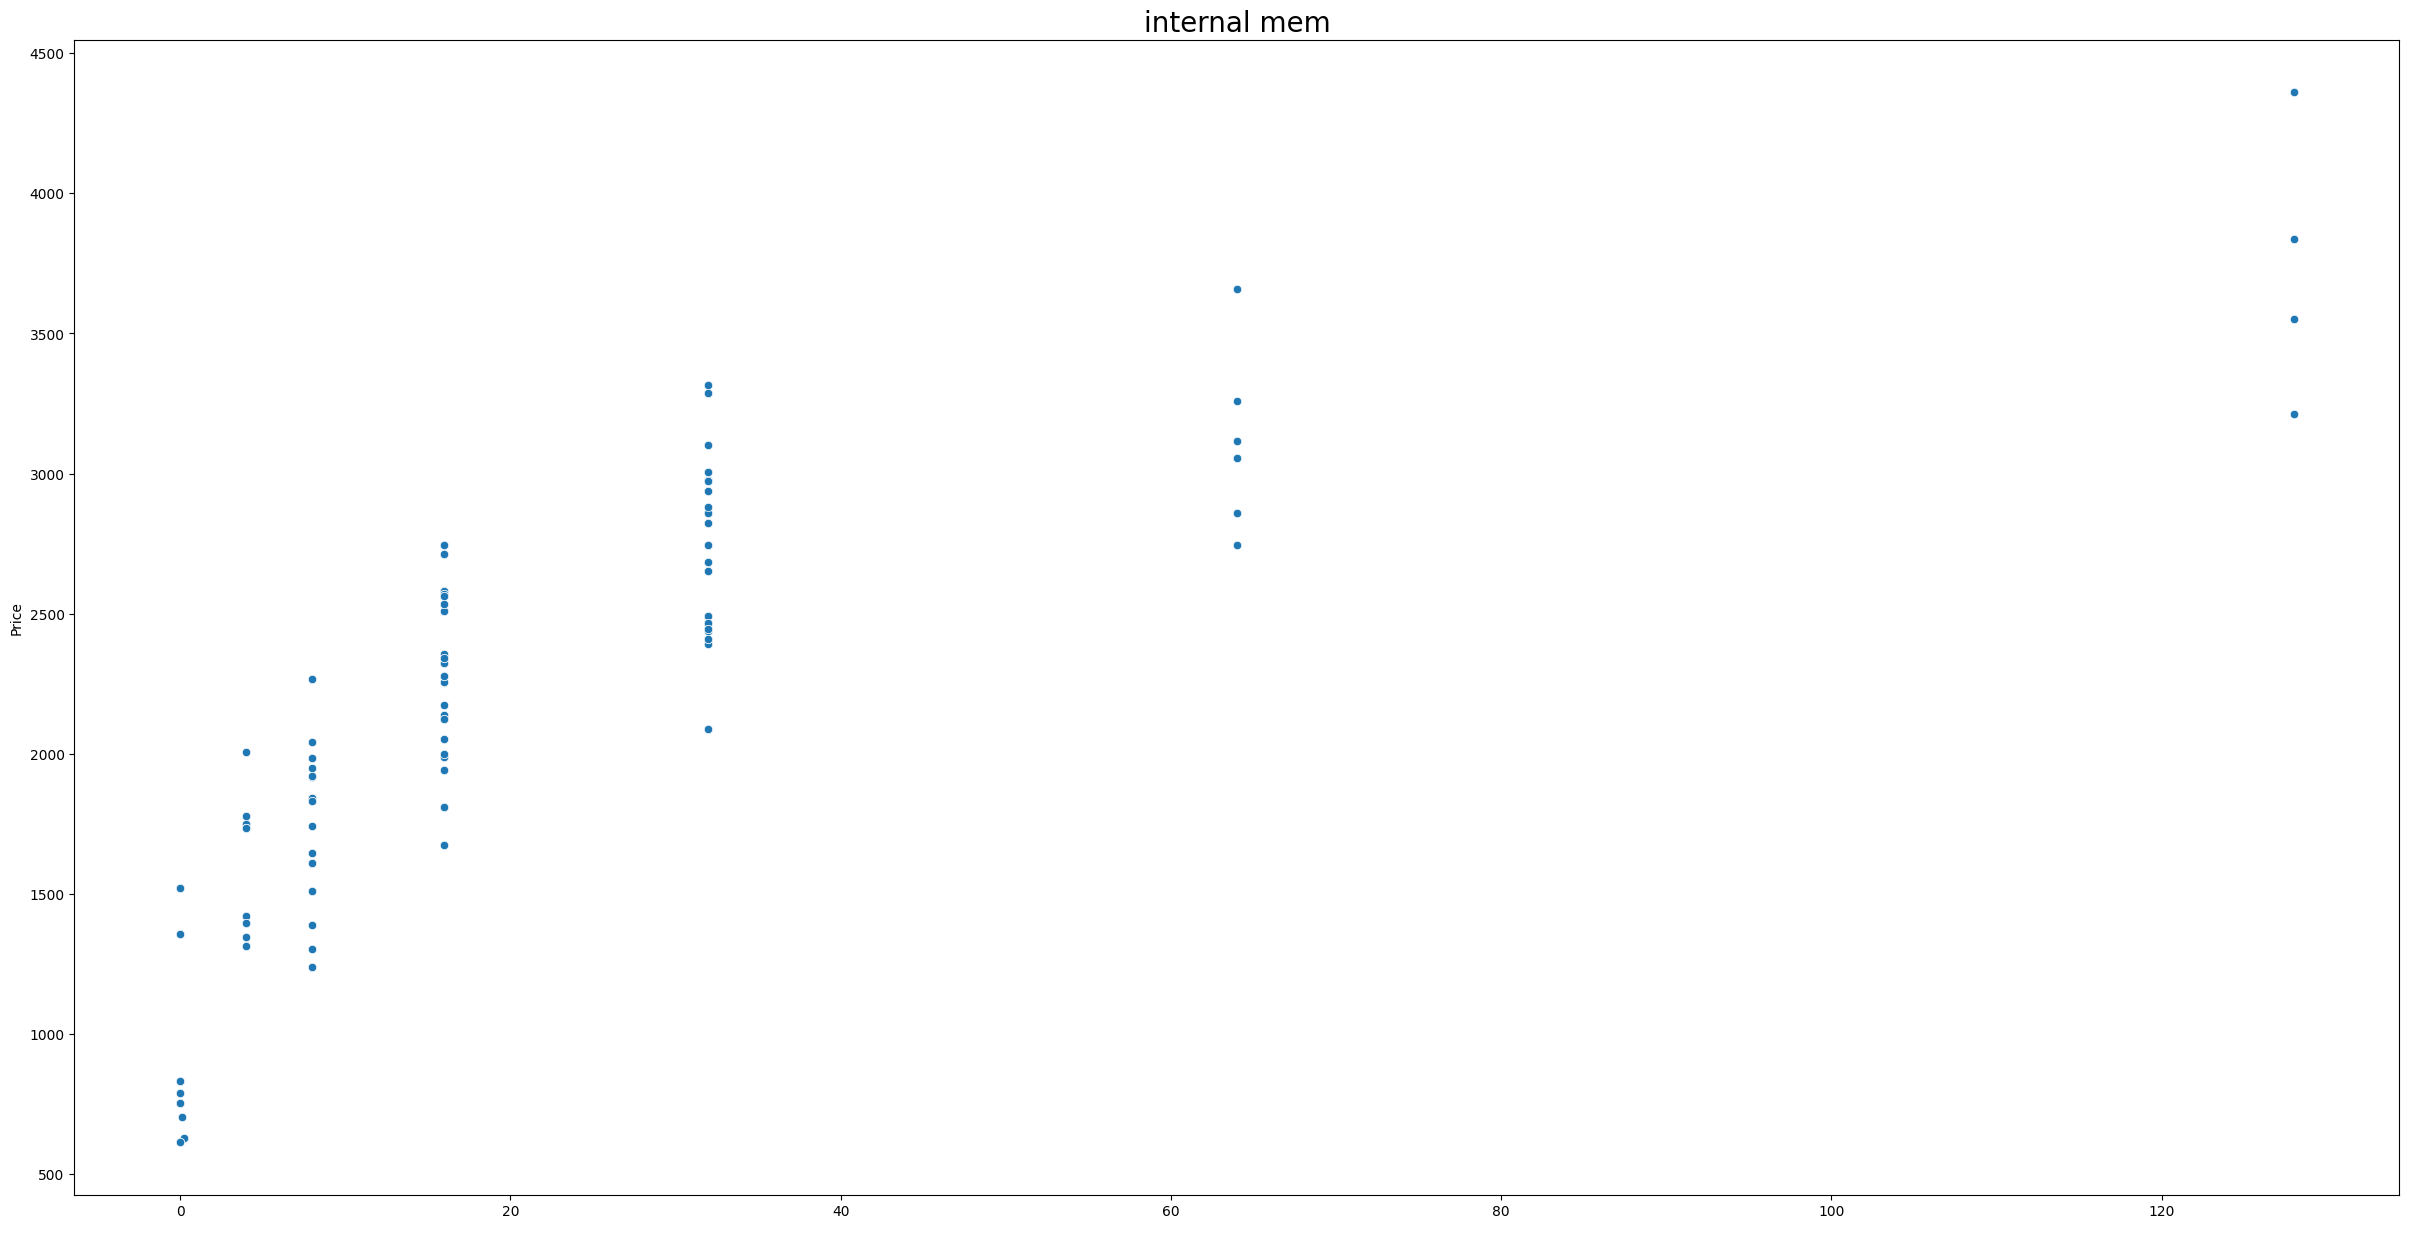

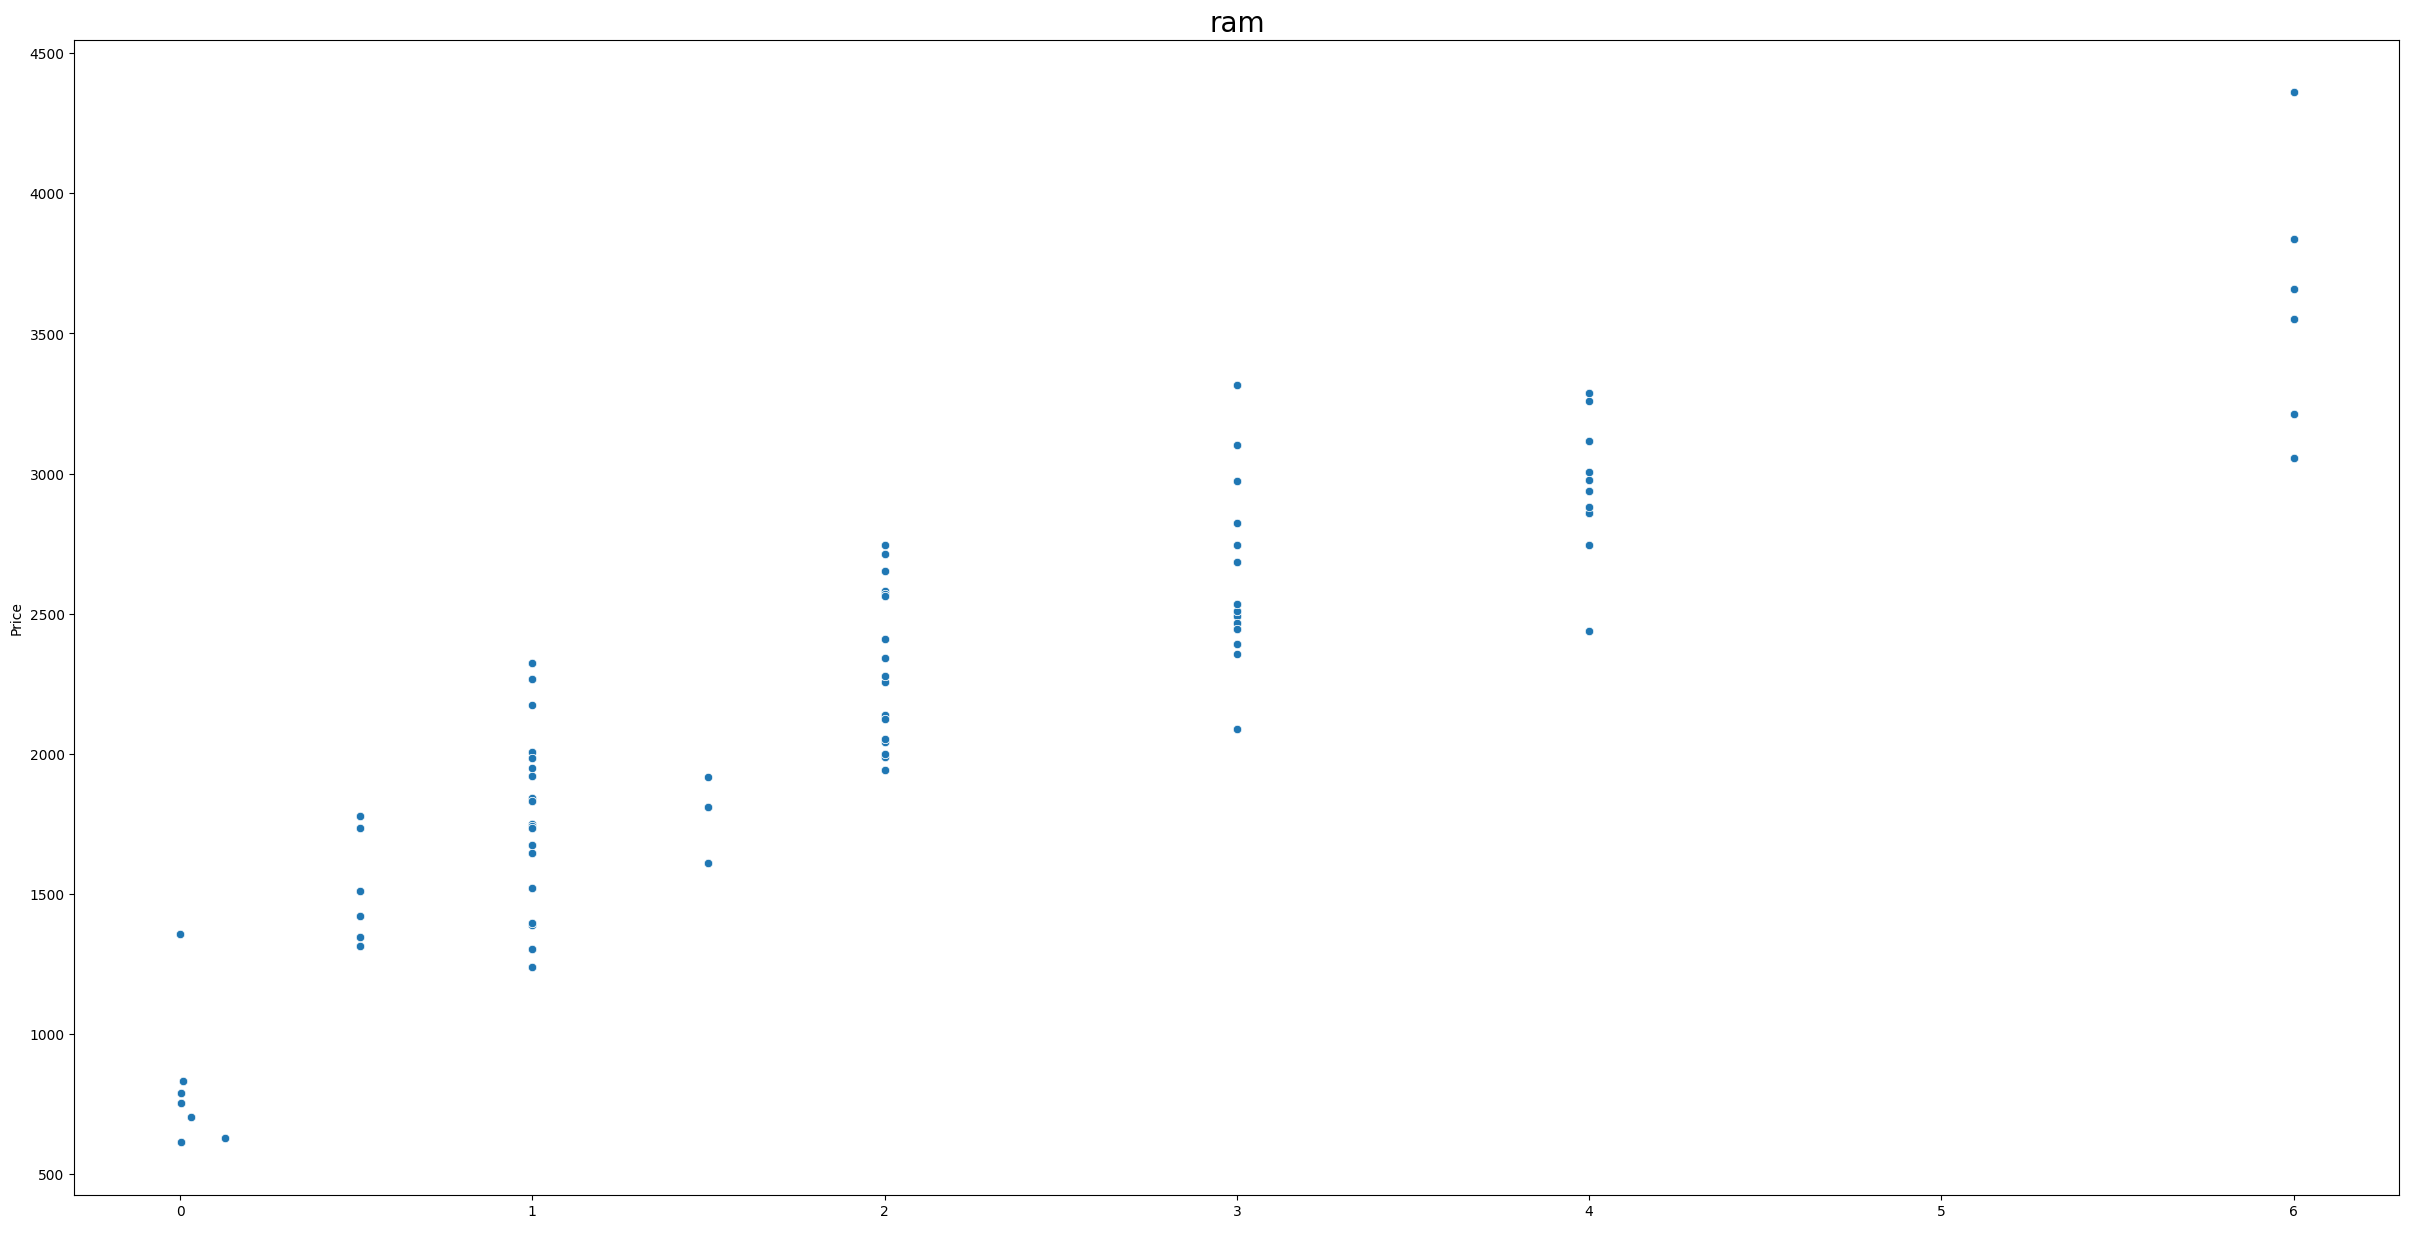

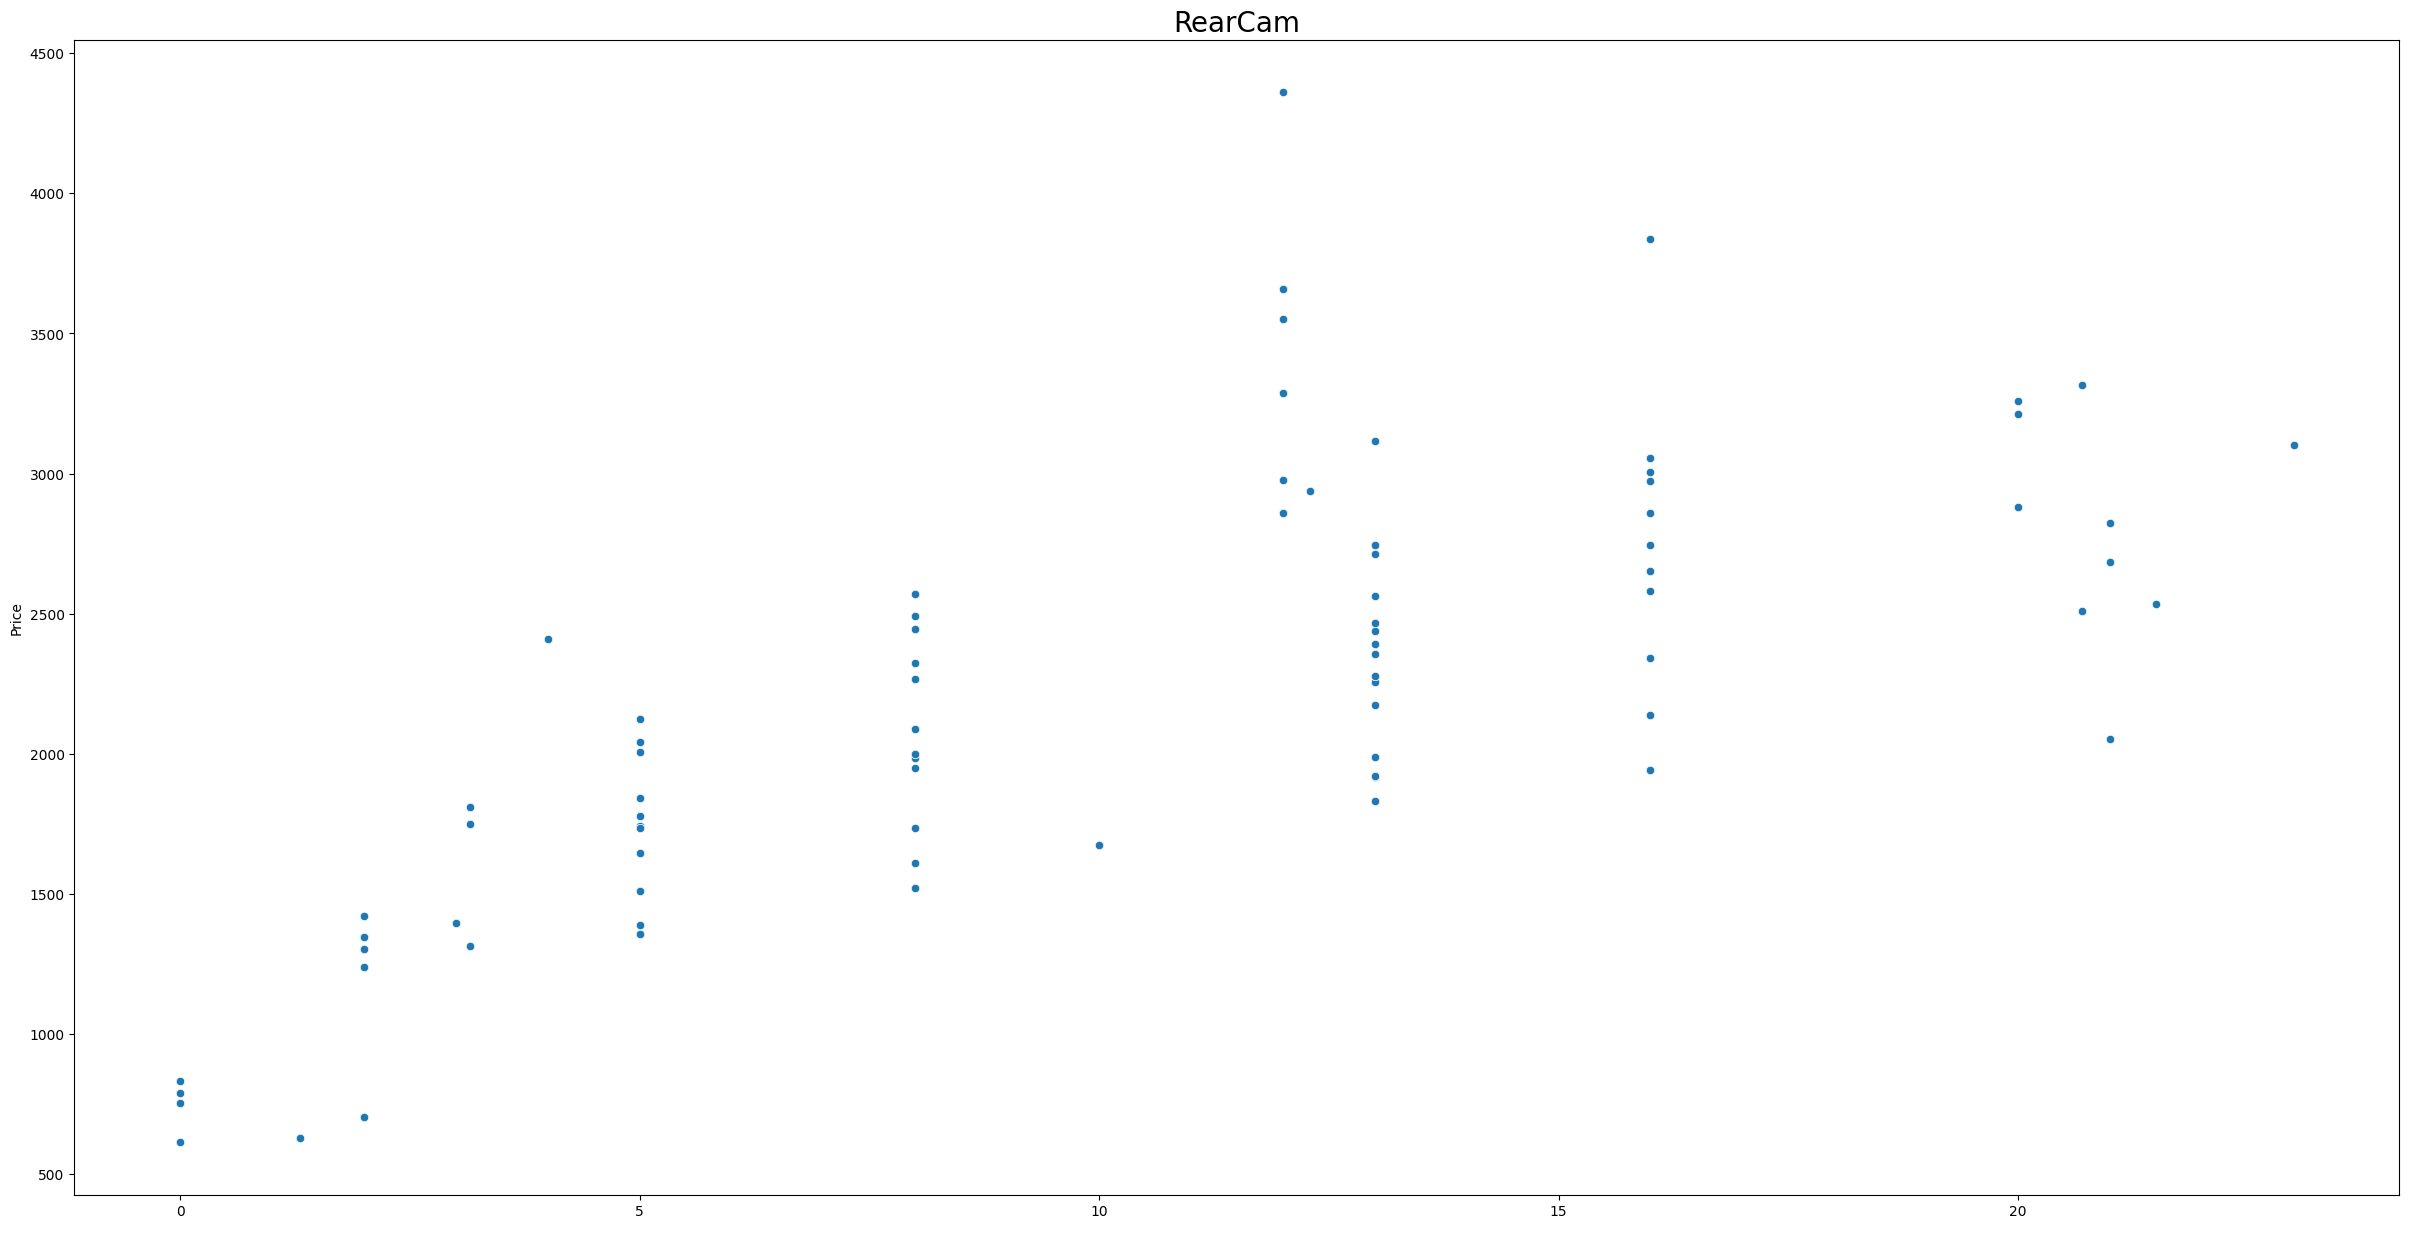

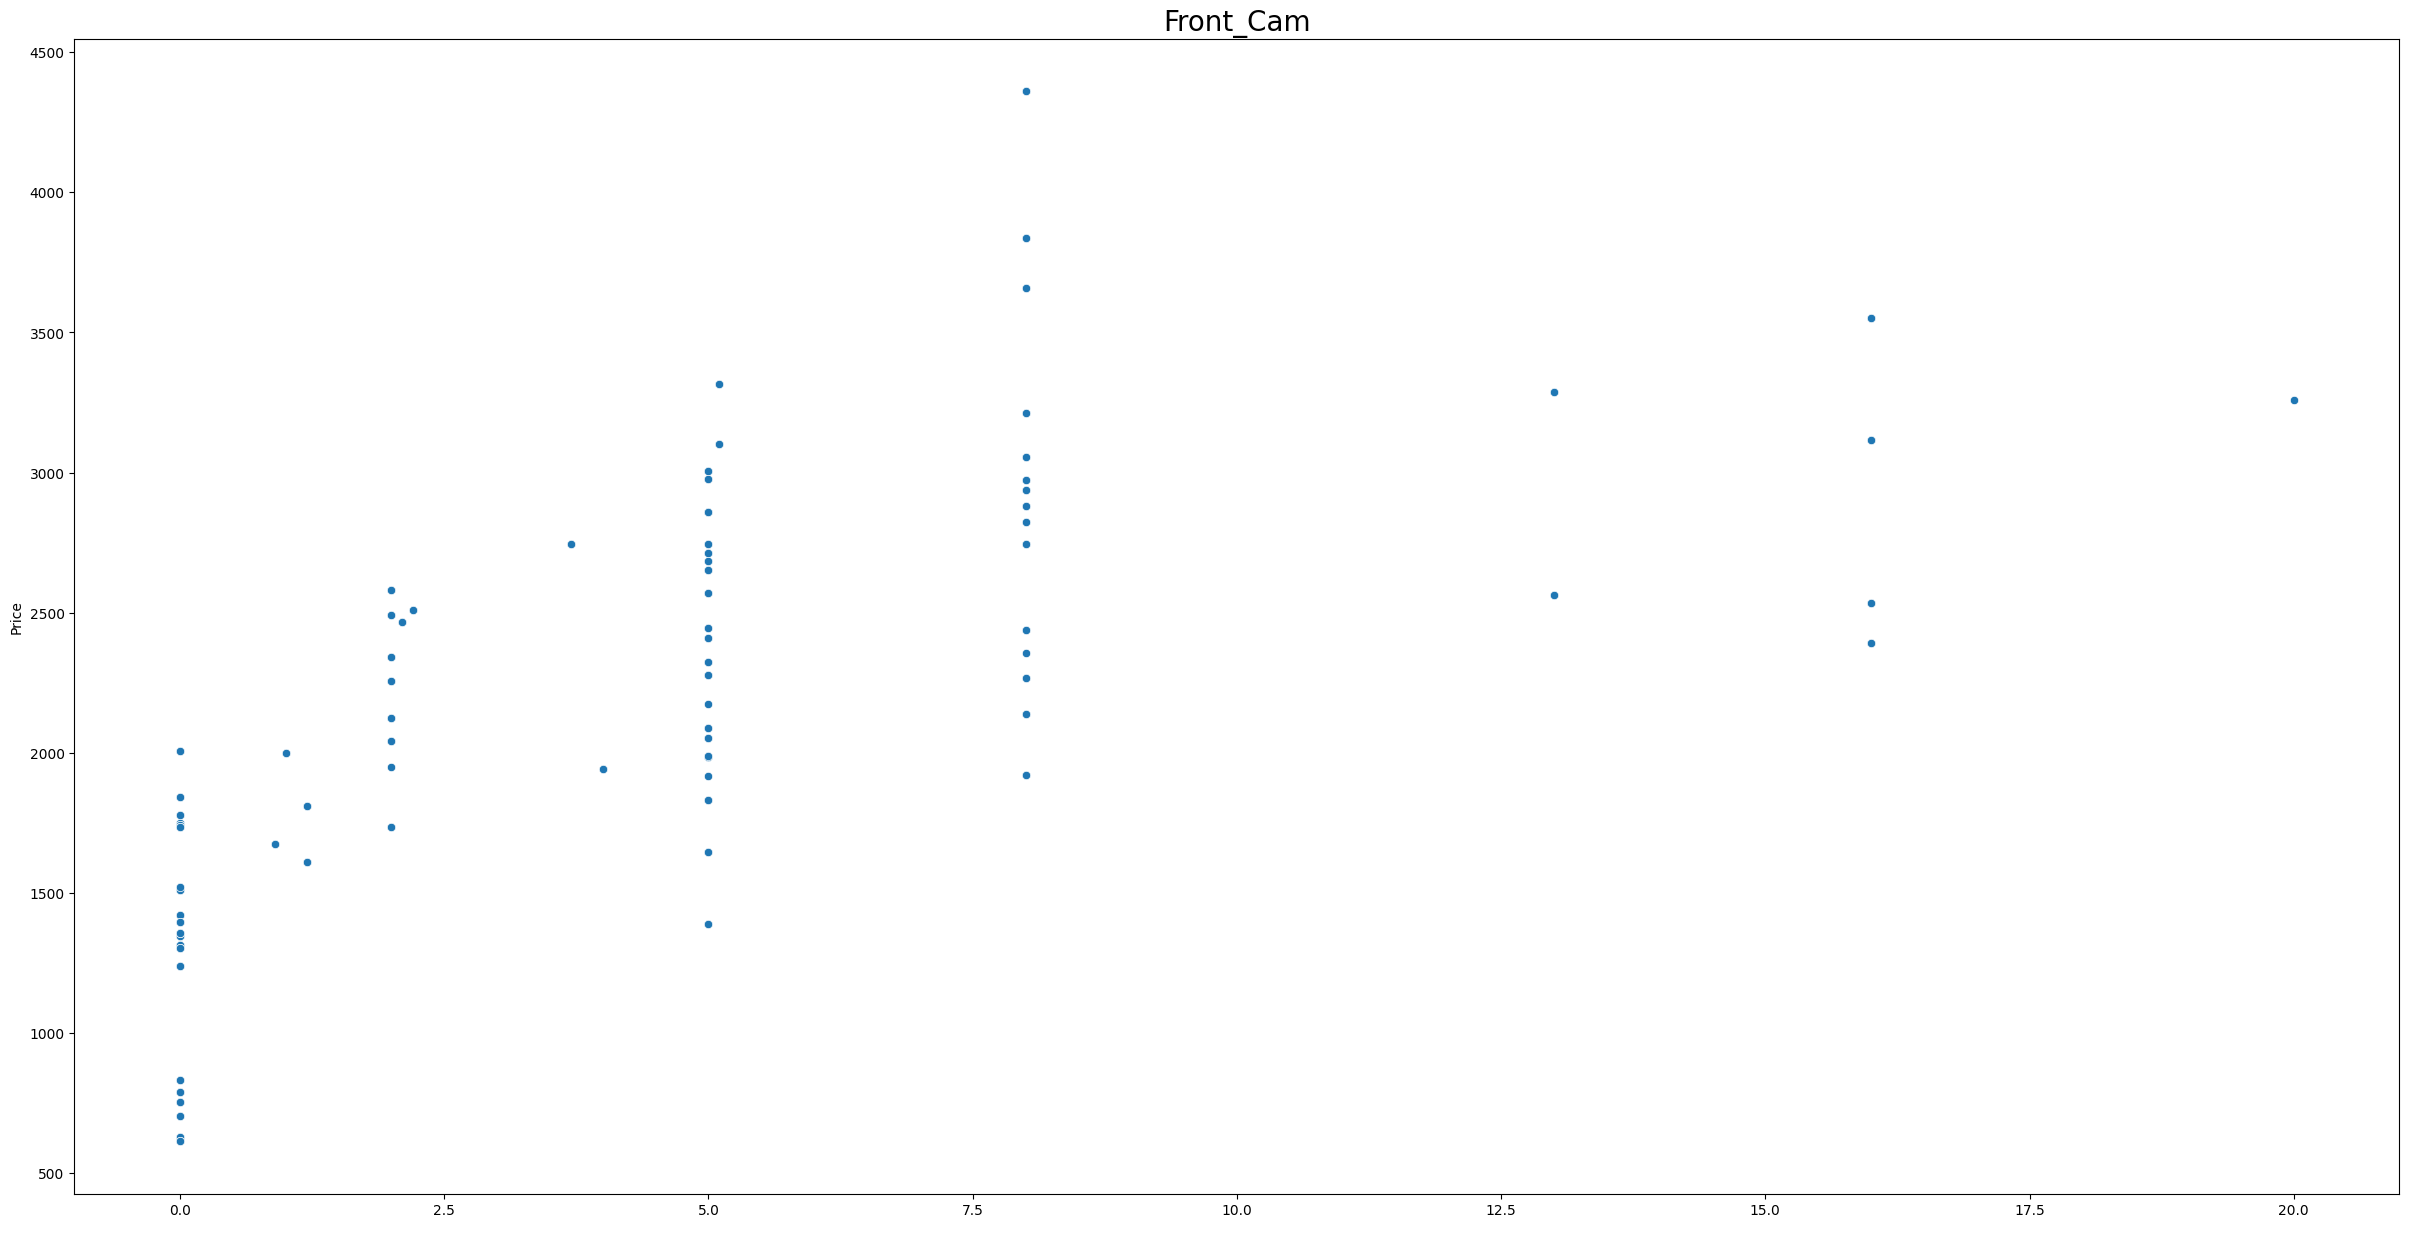

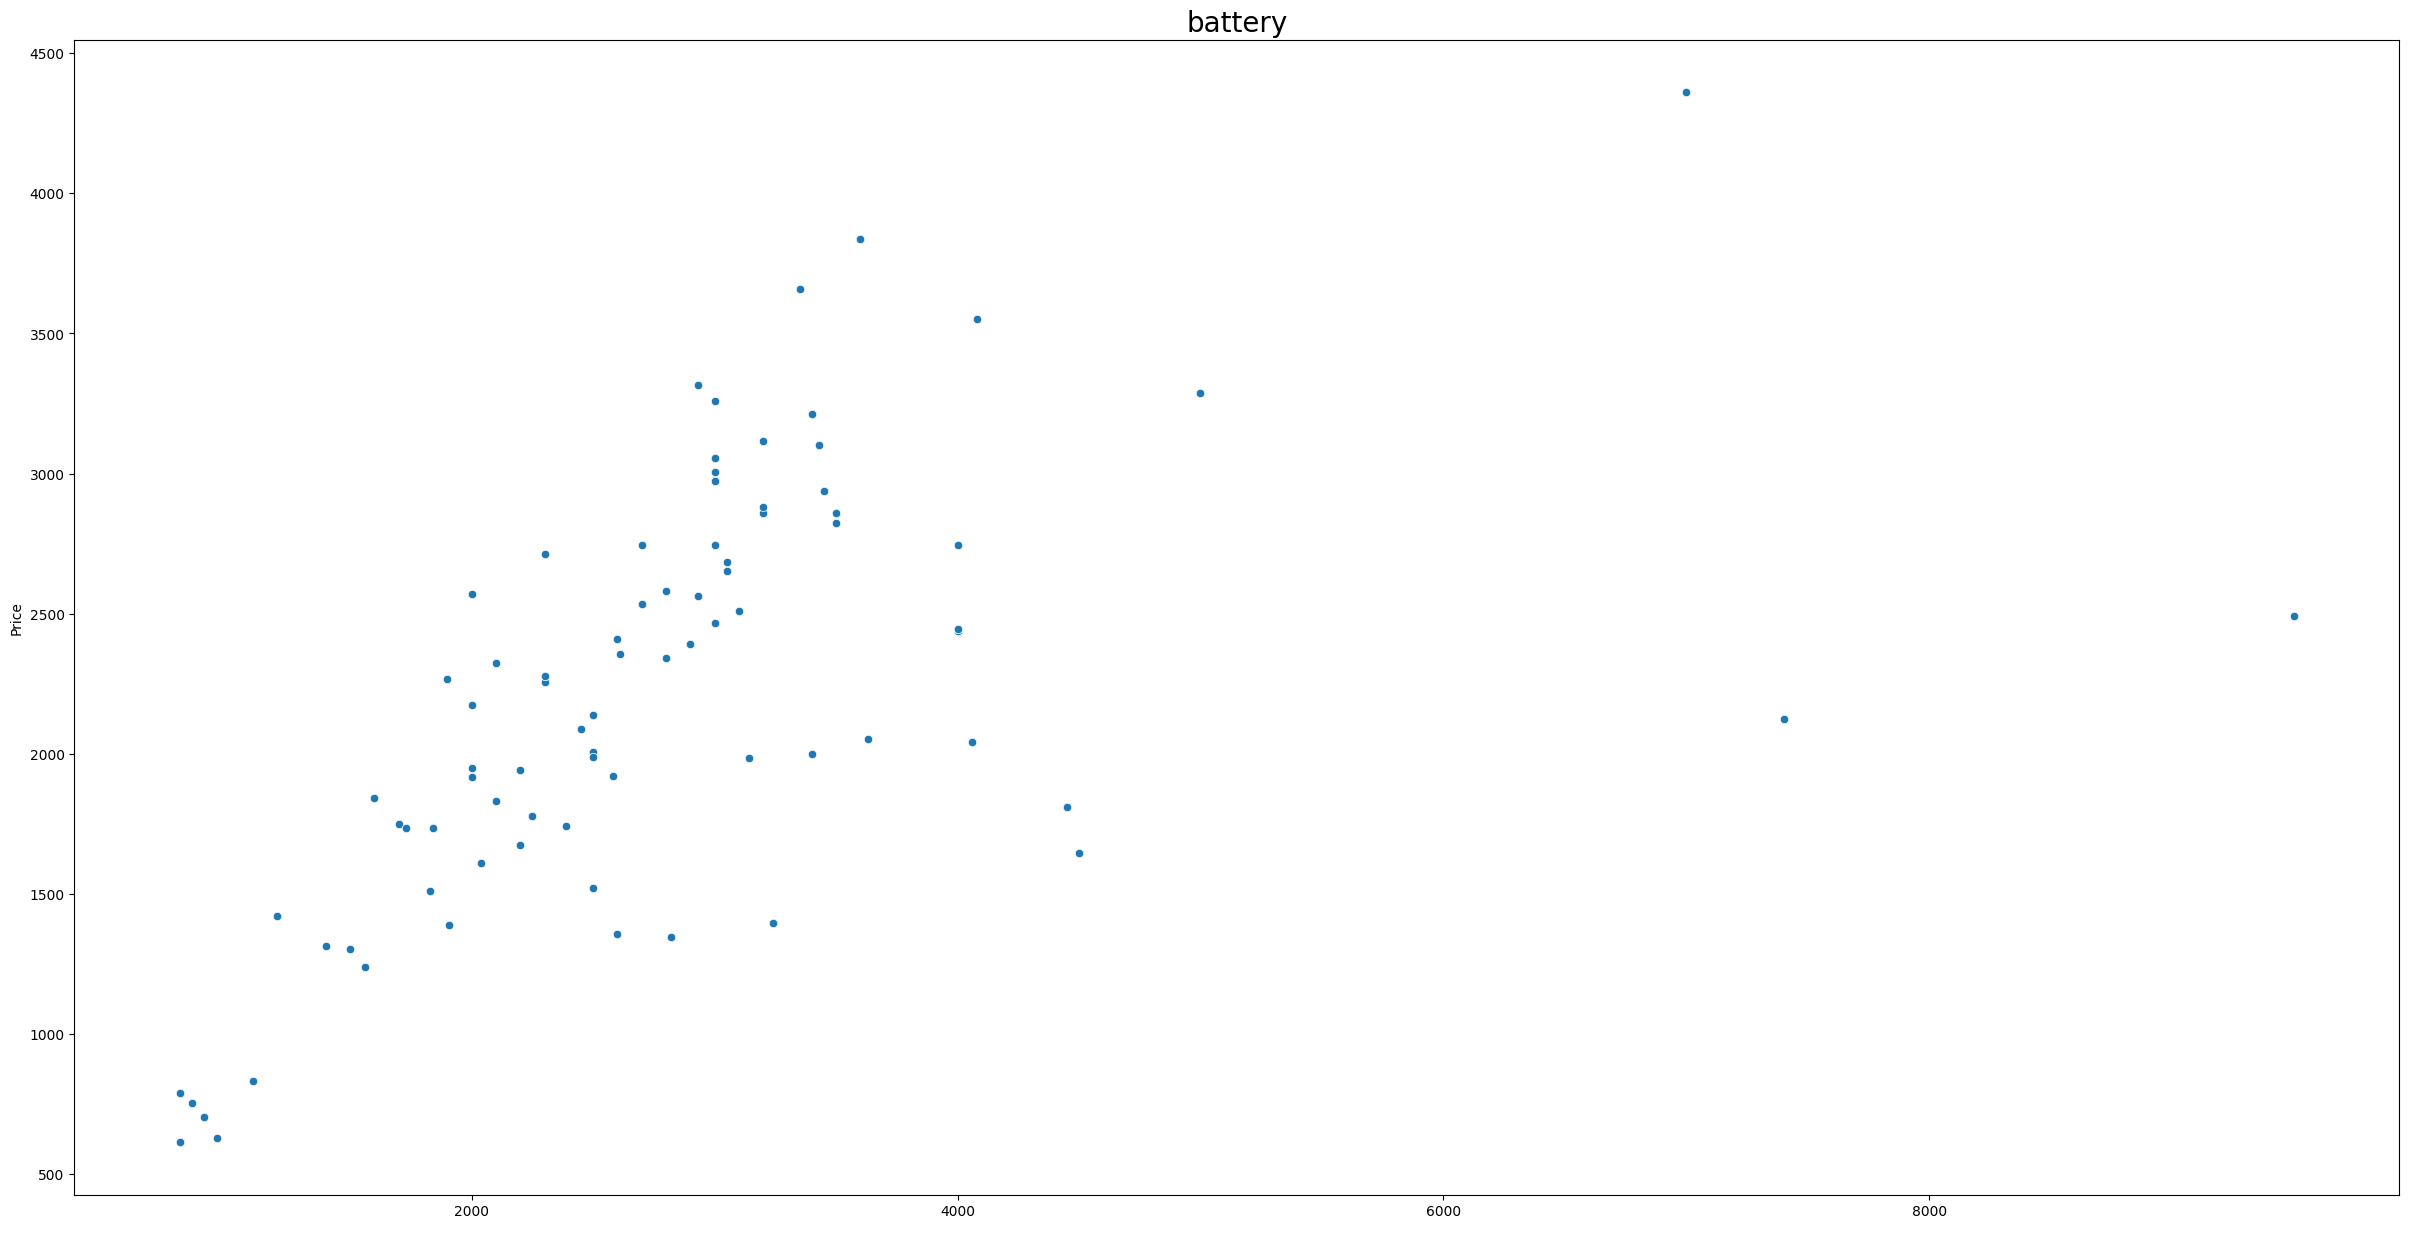

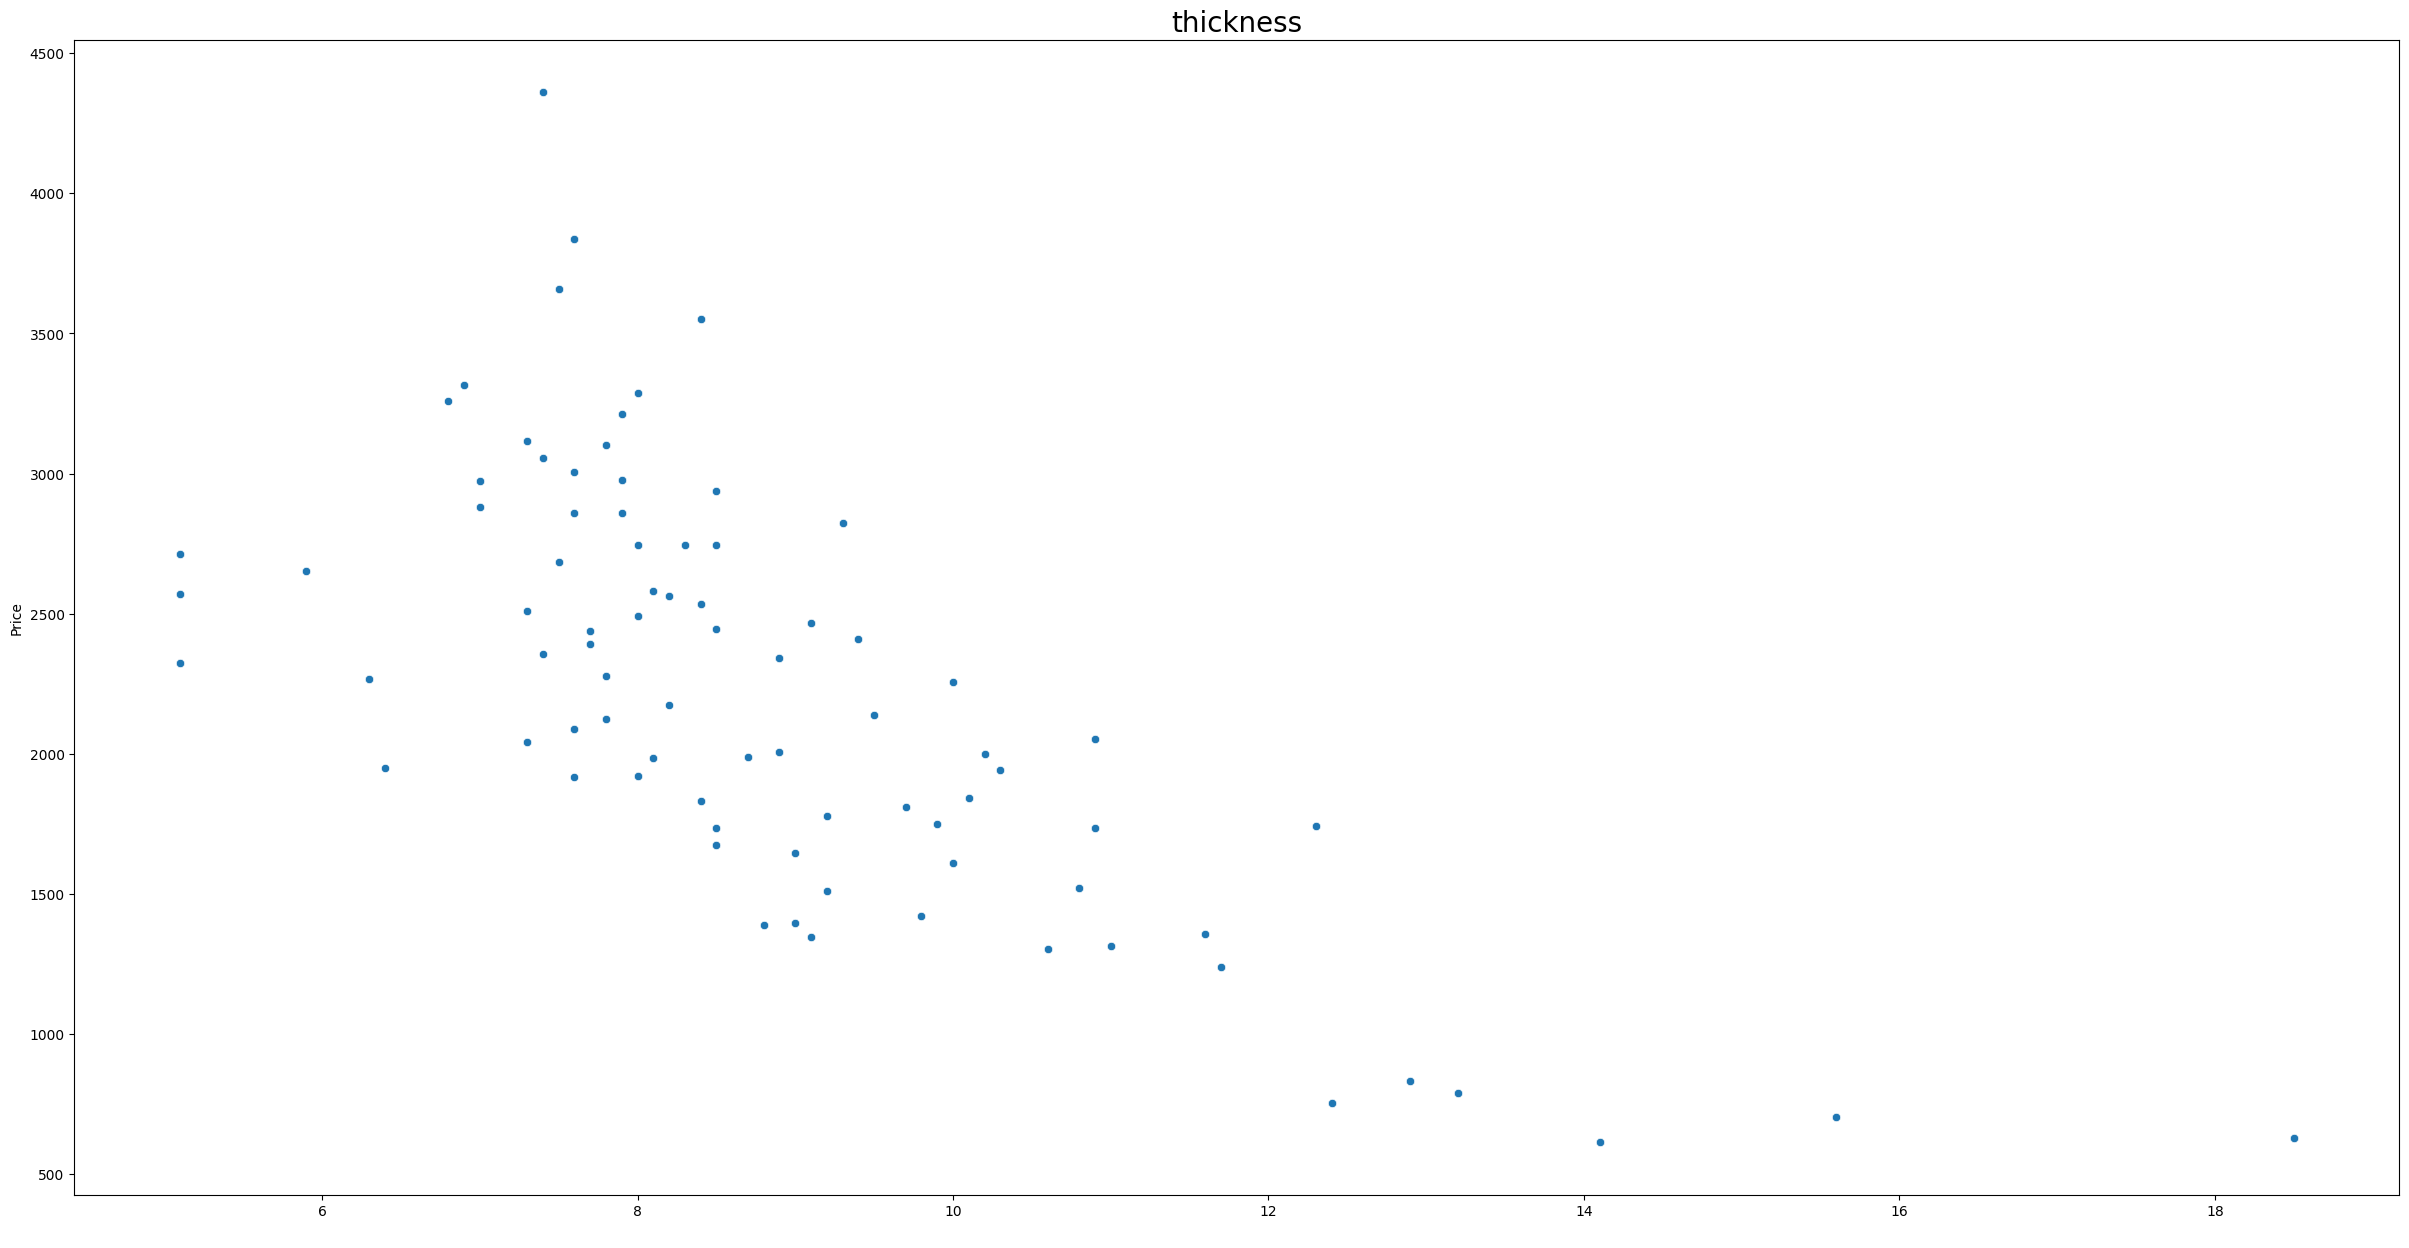

In [ ]:
df_target = df["Price"]
for col in df_columns:
    plt.figure(figsize = (30,15))
    sns.scatterplot(data = df, x = col, y = df_target)
    plt.xlabel(" ")
    plt.title(col,size = 20)
    plt.show()

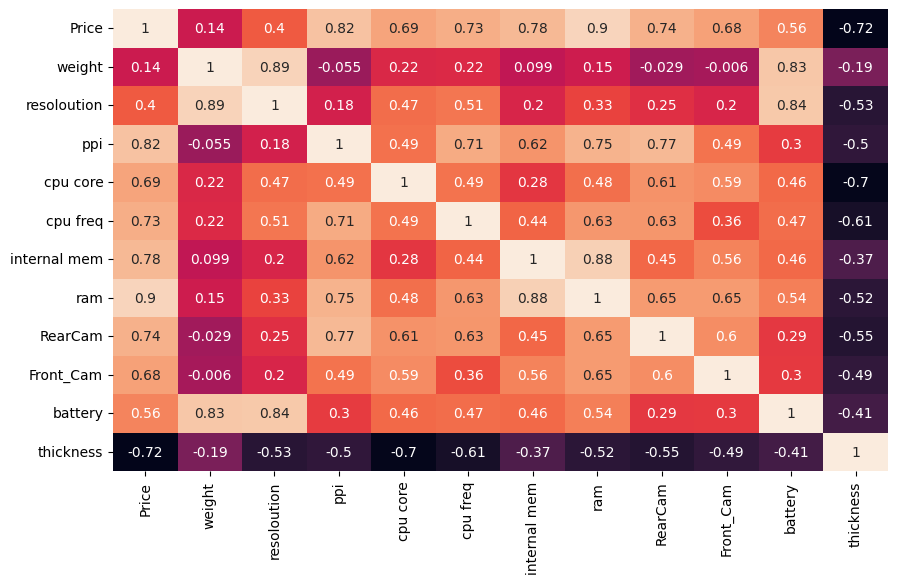

In [ ]:
df1 = df.drop(columns=["Product_id","Sale"])
plt.figure(figsize = (10,6))
sns.heatmap(df1.corr(), annot = True, cbar = False)
plt.show()

### Обработка данных
**Удаление выбросов в цене**

In [ ]:
df.sort_values(by = ['Price'], inplace = True, ascending=False)
df.reset_index(inplace = True, drop=True)
df.drop([0, 1], inplace = True)

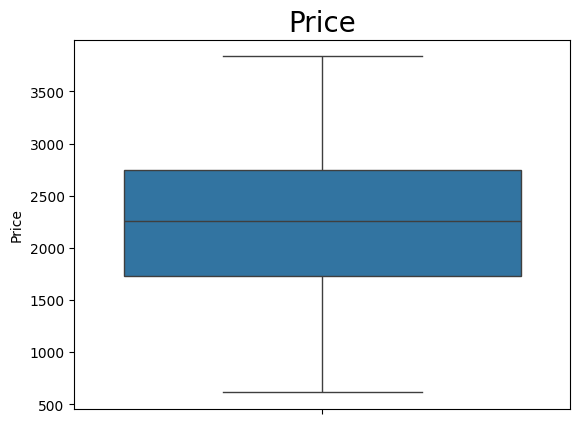

In [ ]:
sns.boxplot(y = df['Price'])
plt.title('Price', size = 20)
plt.show()

**Проверка пропущенных значений:** пропущенные значения отсутствуют

In [ ]:
df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

### Моделирование и оценка результатов

In [ ]:
x = df.drop("Price", axis = 1)
y = df["Price"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 106)

**Модель линейной регрессии**

In [ ]:
def lin_reg (x_train, x_test, y_train, y_test ):
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_train)
    y_pred2 = reg.predict(x_test)

    print('b:', reg.intercept_)
    print('m:', reg.coef_)
    print('R2:', r2_score(y_train, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred2)*100)

    return y_pred

In [ ]:
y = lin_reg(x_train, x_test, y_train, y_test)

b: 1794.0009115794066
m: [ 5.78918549e-02 -2.77794392e-02 -6.47381193e-01 -5.15950026e+01
  8.50565361e-01  4.38167160e+01  1.29056668e+02  5.64945792e+00
  9.33502765e+01  8.02591725e+00  1.31973991e+01  1.18402968e-01
 -8.14057639e+01]
R2: 0.953142221130054
MAPE: 7.635133766314101


**Модель регрессии ближайшего соседа**

In [ ]:
def neighbor (x_train, x_test, y_train, y_test):
    reg = KNeighborsRegressor()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    print('R2:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred)*100)

    return y_pred

In [ ]:
y2 = neighbor (x_train, x_test, y_train, y_test)

R2: 0.7477878443118332
MAPE: 13.04161978901362


**Модель регрессии дерева решений**

In [ ]:
def des_tree (x_train, x_test, y_train, y_test):
    reg = DecisionTreeRegressor()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    print('R2:', r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred)*100)

    return y_pred

In [ ]:
y3 = des_tree (x_train, x_test, y_train, y_test)

R2: 0.9175159235983726
MAPE: 3.3268967540599146


### Внедрение и рекомендации
Под выбранные критерии успеха подходят модели линейной регрессии и регрессии дерева решений. В таком случае, решение о выборе модели будет зависеть от пожеланий заказчика